In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('distilBERTed_Feelings.csv', skipinitialspace=True)
pd.set_option('display.max_columns', None)

### Data Understanding

In [3]:
df.dtypes

Anger                float64
Disgust              float64
Fear                 float64
Joy                  float64
Neutral              float64
Sadness              float64
Surprise             float64
AG6019_neg           float64
AG6019_pos           float64
neg                  float64
neu                  float64
pos                  float64
compound             float64
TB_Pol_label          object
TB_Sub_label          object
TB_Polarity          float64
TB_Subjectivity      float64
score                  int64
self_text             object
subreddit             object
ups                    int64
post_score             int64
post_title            object
post_upvote_ratio    float64
date                  object
year                   int64
month                  int64
numerical_label        int64
dtype: object

In [4]:
df.tail()

,Anger,Disgust,Fear,Joy,Neutral,Sadness,Surprise,AG6019_neg,AG6019_pos,neg,neu,pos,compound,TB_Pol_label,TB_Sub_label,TB_Polarity,TB_Subjectivity,score,self_text,subreddit,ups,post_score,post_title,post_upvote_ratio,date,year,month,numerical_label
1289894,0.041190,0.019342,0.002010,0.009492,0.899839,0.002244,0.025882,0.008665,0.991335,0.000,0.793,0.207,0.8360,pos,sub,0.380000,0.496667,12,I honestly believe everyone instinctual knows ...,SandersForPresident,12,1089,"On Tax Avoidance, Says Bernie Sanders, 'Trump ...",1.0,2023-01-01 12:38:20,2023,1,22803
1289895,0.107926,0.192499,0.019451,0.001186,0.122443,0.469008,0.087488,0.959573,0.040427,0.000,1.000,0.000,0.0000,neu,sub,0.000000,0.500000,1,Not getting enough attention at home?,republicanmemes,1,0,"This is statistically true, 80% of congression...",0.4,2023-01-01 05:24:40,2023,1,22804
1289896,0.039832,0.024182,0.009247,0.048048,0.841859,0.011504,0.025329,0.854094,0.145906,0.000,0.588,0.412,0.2732,neu,obj,0.000000,0.000000,41,"Well, there's another no-brainer",SandersForPresident,41,1089,"On Tax Avoidance, Says Bernie Sanders, 'Trump ...",1.0,2023-01-01 02:07:17,2023,1,22803
1289897,0.006786,0.002666,0.002168,0.002576,0.067207,0.002271,0.916326,0.488999,0.511001,0.123,0.789,0.088,-0.3847,neg,sub,-0.050000,0.375000,2,Do we have a list of all people of all politic...,progressive,2,219,Yet Another Republican Commits Voter Fraud - J...,1.0,2023-01-01 01:05:18,2023,1,22800
1289898,0.916936,0.010245,0.002528,0.003147,0.012894,0.037237,0.017013,0.973095,0.026905,0.179,0.678,0.143,-0.4417,neg,sub,-0.319792,0.708333,3,you know that list is gonna be a whole bunch o...,progressive,3,219,Yet Another Republican Commits Voter Fraud - J...,1.0,2023-01-01 00:57:14,2023,1,22800


In [5]:
df.shape

(1289899, 28)

In [6]:
# Convert 'date' column to datetime type
df['date'] = pd.to_datetime(df['date'])

# Filter out rows with date before August 2023
df = df[df['date'] >= '2023-08-01']

df.shape

(1286484, 28)

In [7]:
df.describe()

,Anger,Disgust,Fear,Joy,Neutral,Sadness,Surprise,AG6019_neg,AG6019_pos,neg,neu,pos,compound,TB_Polarity,TB_Subjectivity,score,ups,post_score,post_upvote_ratio,year,month,numerical_label
count,1.286484e+06,1.286484e+06,1.286484e+06,1.286484e+06,1.286484e+06,1.286484e+06,1.286484e+06,1.286484e+06,1.286484e+06,1.286484e+06,1.286484e+06,1.286484e+06,1.286484e+06,1.286484e+06,1.286484e+06,1.286484e+06,1.286484e+06,1.286484e+06,1.286484e+06,1.286484e+06,1.286484e+06,1.286484e+06
mean,1.460088e-01,1.664520e-01,5.560706e-02,4.118069e-02,4.397012e-01,5.110265e-02,9.994760e-02,4.458368e-01,5.541632e-01,1.060650e-01,7.823130e-01,1.111267e-01,-7.642425e-03,4.687046e-02,3.907045e-01,2.757719e+01,2.757719e+01,3.363273e+03,8.691698e-01,2.023633e+03,5.308201e+00,1.082435e+04
std,2.084170e-01,2.301682e-01,1.509187e-01,1.360470e-01,3.376018e-01,1.286356e-01,1.988692e-01,3.860154e-01,3.860154e-01,1.392807e-01,1.819977e-01,1.442714e-01,4.999150e-01,2.631926e-01,2.986047e-01,1.762180e+02,1.762180e+02,5.678640e+03,1.875656e-01,4.818624e-01,4.723448e+00,6.212741e+03
min,4.911333e-04,1.277608e-04,1.751437e-04,1.881637e-04,2.683082e-04,5.632617e-04,2.323452e-04,4.900814e-03,1.283772e-02,0.000000e+00,0.000000e+00,0.000000e+00,-9.995000e-01,-1.000000e+00,0.000000e+00,-7.850000e+02,-7.850000e+02,0.000000e+00,3.000000e-02,2.023000e+03,1.000000e+00,0.000000e+00
25%,1.510107e-02,1.517589e-02,4.017465e-03,2.353117e-03,9.531220e-02,7.236056e-03,6.851578e-03,4.003613e-02,1.239966e-01,0.000000e+00,6.850000e-01,0.000000e+00,-4.019000e-01,-1.666667e-02,0.000000e+00,1.000000e+00,1.000000e+00,1.740000e+02,8.700000e-01,2.023000e+03,1.000000e+00,5.443000e+03
50%,4.786513e-02,5.669913e-02,8.982986e-03,4.392942e-03,4.038944e-01,1.379459e-02,1.918165e-02,3.739527e-01,6.260473e-01,6.200000e-02,7.970000e-01,7.300000e-02,0.000000e+00,0.000000e+00,4.234127e-01,4.000000e+00,4.000000e+00,1.068000e+03,9.500000e-01,2.024000e+03,2.000000e+00,1.093700e+04
75%,1.826189e-01,2.211657e-01,2.660132e-02,1.209091e-02,7.830107e-01,3.213197e-02,7.510612e-02,8.760034e-01,9.599639e-01,1.680000e-01,9.210000e-01,1.690000e-01,4.003000e-01,1.666667e-01,6.000000e-01,1.400000e+01,1.400000e+01,4.118000e+03,9.700000e-01,2.024000e+03,1.100000e+01,1.605000e+04
max,9.950599e-01,9.928847e-01,9.958274e-01,9.946395e-01,9.818503e-01,9.915407e-01,9.871799e-01,9.871623e-01,9.950992e-01,1.000000e+00,1.000000e+00,1.000000e+00,9.999000e-01,1.000000e+00,1.000000e+00,1.964100e+04,1.964100e+04,6.765300e+04,1.000000e+00,2.024000e+03,1.200000e+01,2.256500e+04


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1286484 entries, 0 to 1286483
Data columns (total 28 columns):
 #   Column             Non-Null Count    Dtype         
---  ------             --------------    -----         
 0   Anger              1286484 non-null  float64       
 1   Disgust            1286484 non-null  float64       
 2   Fear               1286484 non-null  float64       
 3   Joy                1286484 non-null  float64       
 4   Neutral            1286484 non-null  float64       
 5   Sadness            1286484 non-null  float64       
 6   Surprise           1286484 non-null  float64       
 7   AG6019_neg         1286484 non-null  float64       
 8   AG6019_pos         1286484 non-null  float64       
 9   neg                1286484 non-null  float64       
 10  neu                1286484 non-null  float64       
 11  pos                1286484 non-null  float64       
 12  compound           1286484 non-null  float64       
 13  TB_Pol_label       1286484 

In [9]:
df.shape

(1286484, 28)

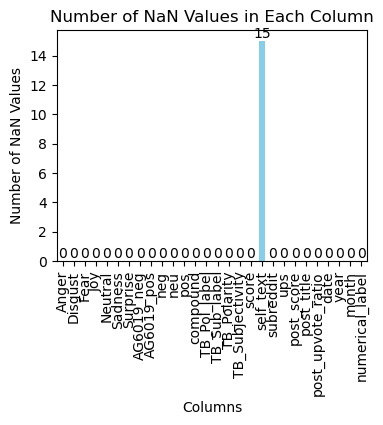

In [10]:
# Calculate the number of NaN values in each column
nan_counts = df.isna().sum()

# Create a bar chart
nan_counts.plot(kind='bar', figsize=(4, 3), color='skyblue')
plt.title('Number of NaN Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Number of NaN Values')

for i, value in enumerate(nan_counts):
    plt.text(i, value, str(value), ha='center', va='bottom')

plt.show()

In [11]:
df.dropna(inplace=True)

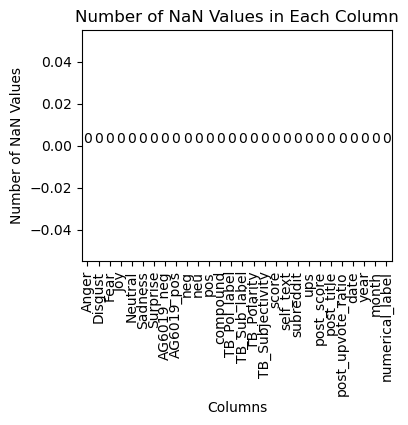

In [12]:
# Calculate the number of NaN values in each column
nan_counts = df.isna().sum()

# Create a bar chart
nan_counts.plot(kind='bar', figsize=(4, 3), color='skyblue')
plt.title('Number of NaN Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Number of NaN Values')

for i, value in enumerate(nan_counts):
    plt.text(i, value, str(value), ha='center', va='bottom')

plt.show()

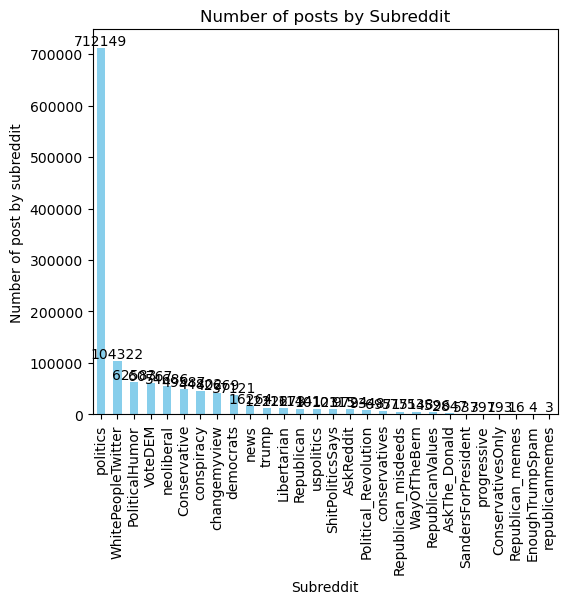

In [13]:
sub_counts = df['subreddit'].value_counts()

plt.figure(figsize=(6, 5))
sub_counts.plot(kind='bar', color='skyblue')
plt.title('Number of posts by Subreddit')
plt.xlabel('Subreddit')
plt.ylabel('Number of post by subreddit')

plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
for i, value in enumerate(sub_counts):
    plt.text(i, value, str(value), ha='center', va='bottom')

plt.show()

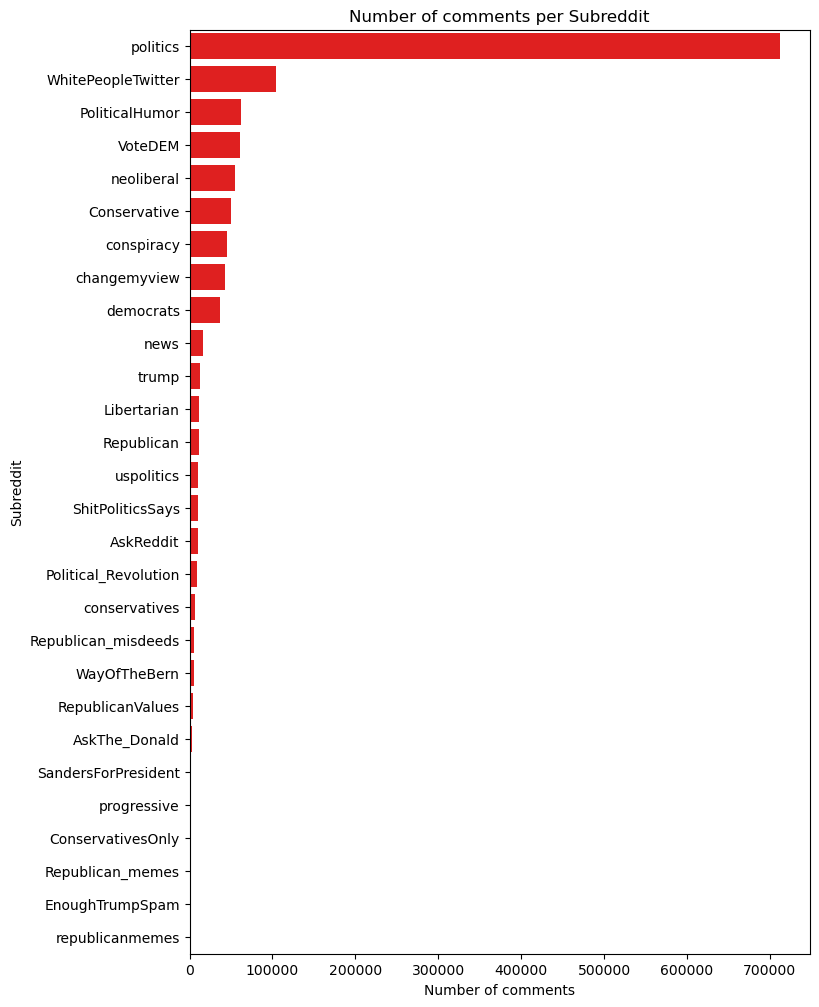

In [20]:
sub_counts = df['subreddit'].value_counts()

plt.figure(figsize=(8, 12))  # Adjust figure size to accommodate the change in orientation
sns.barplot(x=sub_counts.values, y=sub_counts.index, color='red')  # Use Seaborn's barplot

plt.title('Number of comments per Subreddit')
plt.xlabel('Number of comments')
plt.ylabel('Subreddit')

plt.show()

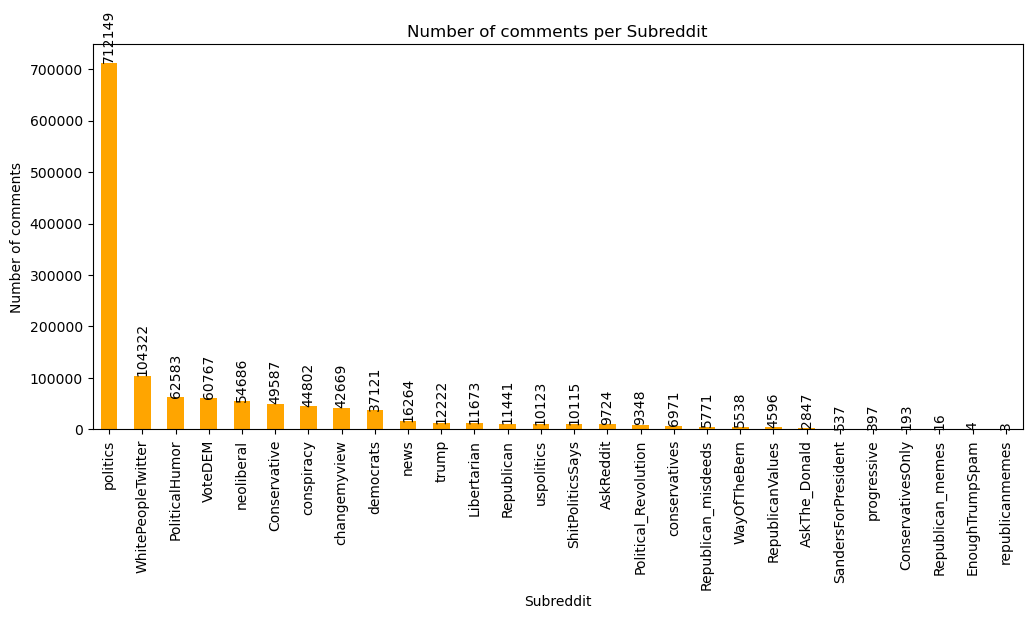

In [ ]:
    sub_counts = df['subreddit'].value_counts()

    plt.figure(figsize=(12, 5))
    sub_counts.plot(kind='bar', color='orange')
    plt.title('Number of comments per Subreddit')
    plt.xlabel('Subreddit')
    plt.ylabel('Number of comments')

    plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
    for i, value in enumerate(sub_counts):
        plt.text(i, value, str(value), ha='center', va='bottom', rotation=90)  # Adjust rotation here

    plt.show()

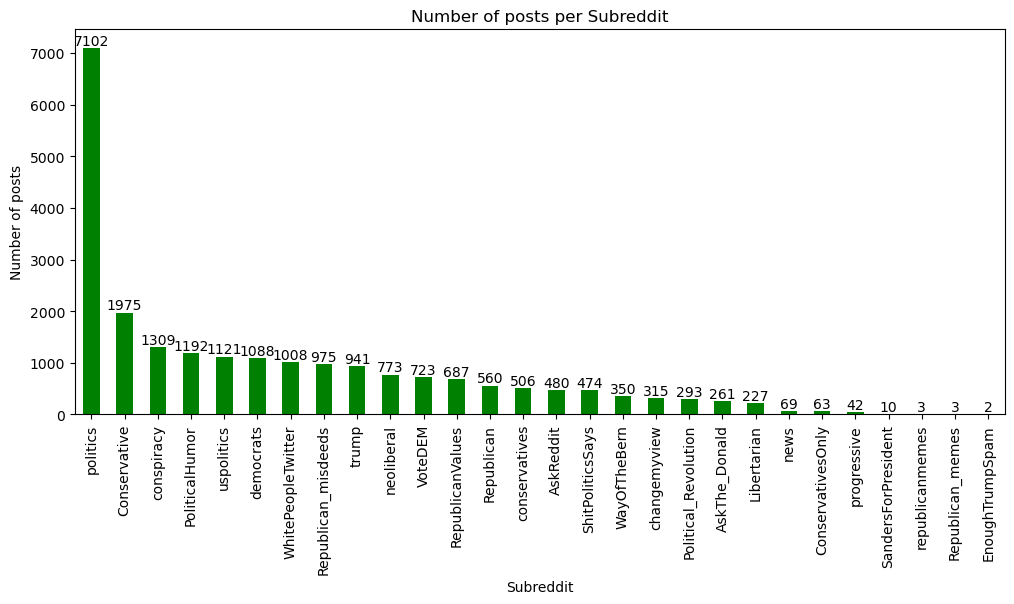

In [ ]:
filtered_df = df.drop_duplicates(subset=['post_title'])
sub_counts = filtered_df['subreddit'].value_counts()

plt.figure(figsize=(12, 5))
sub_counts.plot(kind='bar', color='green')
plt.title('Number of posts per Subreddit')
plt.xlabel('Subreddit')
plt.ylabel('Number of posts')

plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
for i, value in enumerate(sub_counts):
    plt.text(i, value, str(value), ha='center', va='bottom')

plt.show()

In [ ]:
filtered_df['date'] = pd.to_datetime(filtered_df['date'])

# Create an empty dictionary to store the results
posts_per_day = {}

# Iterate through the DataFrame
for index, row in filtered_df.iterrows():
    date = row['date'].date()  # Extracting the date part
    if date not in posts_per_day:
        posts_per_day[date] = 1
    else:
        posts_per_day[date] += 1

# Printing the dictionary
posts_per_day

C:\Users\javie\AppData\Local\Temp\ipykernel_13036\1024234734.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['date'] = pd.to_datetime(filtered_df['date'])


{datetime.date(2024, 3, 13): 355,
 datetime.date(2024, 3, 12): 241,
 datetime.date(2024, 3, 11): 171,
 datetime.date(2024, 3, 10): 172,
 datetime.date(2024, 3, 9): 194,
 datetime.date(2024, 3, 8): 247,
 datetime.date(2024, 3, 7): 232,
 datetime.date(2024, 3, 6): 247,
 datetime.date(2024, 3, 5): 209,
 datetime.date(2024, 3, 4): 194,
 datetime.date(2024, 3, 3): 171,
 datetime.date(2024, 3, 2): 130,
 datetime.date(2024, 3, 1): 192,
 datetime.date(2024, 2, 29): 214,
 datetime.date(2024, 2, 28): 202,
 datetime.date(2024, 2, 27): 169,
 datetime.date(2024, 2, 26): 190,
 datetime.date(2024, 2, 25): 173,
 datetime.date(2024, 2, 24): 189,
 datetime.date(2024, 2, 23): 204,
 datetime.date(2024, 2, 22): 220,
 datetime.date(2024, 2, 21): 203,
 datetime.date(2024, 2, 20): 184,
 datetime.date(2024, 2, 19): 158,
 datetime.date(2024, 2, 18): 186,
 datetime.date(2024, 2, 17): 188,
 datetime.date(2024, 2, 16): 179,
 datetime.date(2024, 2, 15): 215,
 datetime.date(2024, 2, 14): 202,
 datetime.date(2024, 2,

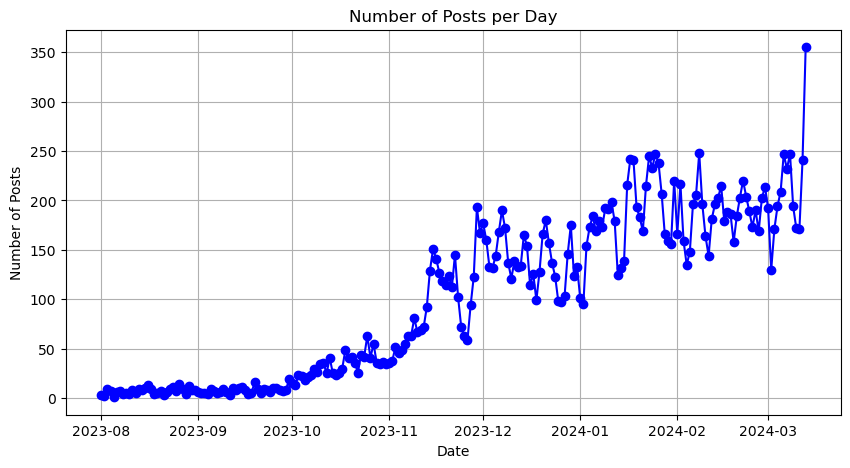

In [ ]:
posts_series = pd.Series(posts_per_day)

# Plotting
plt.figure(figsize=(10, 5))
posts_series.plot(marker='o', color='blue', linestyle='-')
plt.title('Number of Posts per Day')
plt.xlabel('Date')
plt.ylabel('Number of Posts')
plt.grid(True)
plt.show()

In [ ]:
# Create an empty dictionary to store the results
posts_per_week = {}

# Iterate through the DataFrame
for index, row in filtered_df.iterrows():
    week_start = row['date'].to_period('W').start_time.date()  # Get the start date of the week
    if week_start not in posts_per_week:
        posts_per_week[week_start] = 1
    else:
        posts_per_week[week_start] += 1

# Printing the dictionary
posts_per_week

{datetime.date(2024, 3, 11): 767,
 datetime.date(2024, 3, 4): 1495,
 datetime.date(2024, 2, 26): 1268,
 datetime.date(2024, 2, 19): 1331,
 datetime.date(2024, 2, 12): 1347,
 datetime.date(2024, 2, 5): 1302,
 datetime.date(2024, 1, 29): 1212,
 datetime.date(2024, 1, 22): 1551,
 datetime.date(2024, 1, 15): 1383,
 datetime.date(2024, 1, 8): 1190,
 datetime.date(2024, 1, 1): 1055,
 datetime.date(2023, 12, 25): 876,
 datetime.date(2023, 12, 18): 990,
 datetime.date(2023, 12, 11): 965,
 datetime.date(2023, 12, 4): 1064,
 datetime.date(2023, 11, 27): 1047,
 datetime.date(2023, 11, 20): 677,
 datetime.date(2023, 11, 13): 874,
 datetime.date(2023, 11, 6): 470,
 datetime.date(2023, 10, 30): 293,
 datetime.date(2023, 10, 23): 316,
 datetime.date(2023, 10, 16): 249,
 datetime.date(2023, 10, 9): 212,
 datetime.date(2023, 10, 2): 150,
 datetime.date(2023, 9, 25): 77,
 datetime.date(2023, 9, 18): 58,
 datetime.date(2023, 9, 11): 54,
 datetime.date(2023, 9, 4): 46,
 datetime.date(2023, 8, 28): 48,
 da

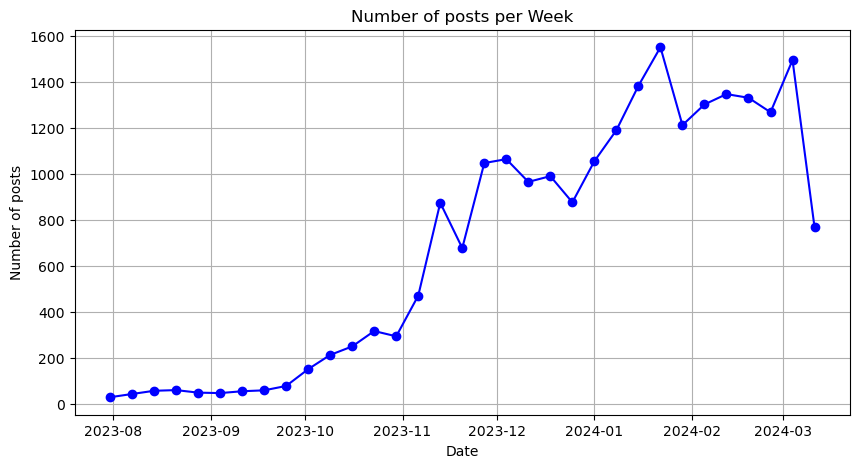

In [ ]:
posts_series = pd.Series(posts_per_week)

# Plotting
plt.figure(figsize=(10, 5))
posts_series.plot(marker='o', color='blue', linestyle='-')
plt.title('Number of posts per Week')
plt.xlabel('Date')
plt.ylabel('Number of posts')
plt.grid(True)
plt.show()

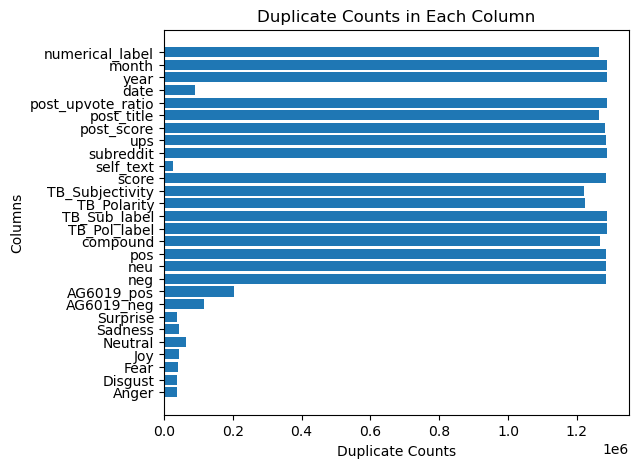

In [ ]:
duplicate_counts = df.apply(lambda x: x.duplicated().sum())

# Plotting
duplicate_counts = df.apply(lambda x: x.duplicated().sum())

# Plotting
plt.figure(figsize=(6, 5))
plt.barh(duplicate_counts.index, duplicate_counts.values)
plt.ylabel('Columns')
plt.xlabel('Duplicate Counts')
plt.title('Duplicate Counts in Each Column')
plt.show()

#### Correlation analysis

In [ ]:
todrop = ['self_text','subreddit', 'post_title','numerical_label','year','month','TB_Pol_label','TB_Sub_label','date']

nostrings = df.drop(columns = todrop)

nostrings.head()

,Anger,Disgust,Fear,Joy,Neutral,Sadness,Surprise,AG6019_neg,AG6019_pos,neg,neu,pos,compound,TB_Polarity,TB_Subjectivity,score,ups,post_score,post_upvote_ratio
0,0.016813,0.005273,0.009925,0.004632,0.944276,0.003072,0.016008,0.017772,0.982228,0.128,0.872,0.000,-0.2263,0.141667,0.200000,1,1,5,0.86
1,0.046038,0.100523,0.006353,0.298049,0.524616,0.020496,0.003925,0.980899,0.019101,0.000,0.426,0.574,0.4019,-0.800000,0.800000,1,1,4,1.00
2,0.341550,0.387735,0.012678,0.016066,0.227679,0.010913,0.003380,0.010122,0.989878,0.000,1.000,0.000,0.0000,0.416667,0.500000,1,1,4,1.00
3,0.054799,0.842066,0.080223,0.000661,0.007585,0.011053,0.003613,0.983229,0.016771,0.179,0.721,0.100,-0.5057,-0.366667,0.366667,1,1,3397,0.98
4,0.066222,0.044903,0.004158,0.002013,0.031070,0.003667,0.847967,0.023260,0.976740,0.000,0.656,0.344,0.6966,0.600000,1.000000,1,1,4,1.00


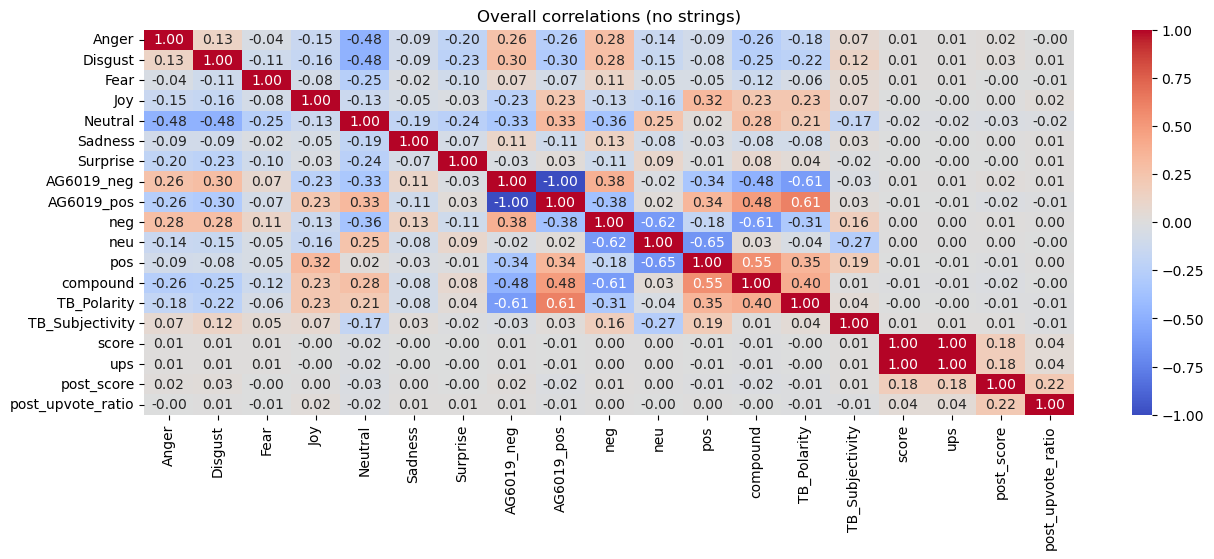

In [ ]:
plt.figure(figsize=(15,5))
sns.heatmap(nostrings.corr(), cmap='coolwarm', fmt=".2f", annot=True)

plt.title('Overall correlations (no strings)')
plt.show()

#### Boxplots

In [ ]:
from tqdm.notebook import tqdm

In [ ]:
numerical_cols = nostrings.select_dtypes(include=['float64', 'int64'])

# Create pairplot with hue
#sns.pairplot(numerical_cols)

# Show the plot
#plt.show()

### Polarity label creation

In [ ]:
# Function to compare values and return polarity
def get_polarity(row):
    if row['AG6019_neg'] > row['AG6019_pos']:
        return 'neg'
    elif row['AG6019_pos'] > row['AG6019_neg']:
        return 'pos'
    else:
        return 'neu'

# Apply the function to create the 'AG6019_polarity' column
df['AG6019_polarity'] = df.apply(get_polarity, axis=1)

# Display the DataFrame with the new column
df.head()

,Anger,Disgust,Fear,Joy,Neutral,Sadness,Surprise,AG6019_neg,AG6019_pos,neg,neu,pos,compound,TB_Pol_label,TB_Sub_label,TB_Polarity,TB_Subjectivity,score,self_text,subreddit,ups,post_score,post_title,post_upvote_ratio,date,year,month,numerical_label,AG6019_polarity
0,0.016813,0.005273,0.009925,0.004632,0.944276,0.003072,0.016008,0.017772,0.982228,0.128,0.872,0.000,-0.2263,pos,obj,0.141667,0.200000,1,"If I could make social media disappear, Tik To...",trump,1,5,The only thing I don’t agree with Trump on.🤷🏼,0.86,2024-03-13 19:38:13,2024,3,0,pos
1,0.046038,0.100523,0.006353,0.298049,0.524616,0.020496,0.003925,0.980899,0.019101,0.000,0.426,0.574,0.4019,neg,sub,-0.800000,0.800000,1,Idiots comforting idiots,politics,1,4,Britt says Mike Johnson told her ‘it will be f...,1.00,2024-03-13 19:38:08,2024,3,1,neg
2,0.341550,0.387735,0.012678,0.016066,0.227679,0.010913,0.003380,0.010122,0.989878,0.000,1.000,0.000,0.0000,pos,sub,0.416667,0.500000,1,"Her speech was anything but ""fine"".",politics,1,4,Britt says Mike Johnson told her ‘it will be f...,1.00,2024-03-13 19:37:47,2024,3,1,pos
3,0.054799,0.842066,0.080223,0.000661,0.007585,0.011053,0.003613,0.983229,0.016771,0.179,0.721,0.100,-0.5057,neg,sub,-0.366667,0.366667,1,Why is it propaganda for someone to say they'r...,politics,1,3397,Haley Shaved 77K Votes Off Trump’s Georgia Win...,0.98,2024-03-13 19:37:42,2024,3,2,neg
4,0.066222,0.044903,0.004158,0.002013,0.031070,0.003667,0.847967,0.023260,0.976740,0.000,0.656,0.344,0.6966,pos,sub,0.600000,1.000000,1,Why is this news? The house leader reassured a...,politics,1,4,Britt says Mike Johnson told her ‘it will be f...,1.00,2024-03-13 19:37:37,2024,3,1,pos


In [ ]:
df['self_text'][3]

"Why is it propaganda for someone to say they're voting 3rd party? Because you don't like their choice? \n\nThis country's duopoly party system is awful and I refuse to participate in it any longer. I'd sooner vote for RFK jr over any RNC or DNC nominee"

In [ ]:
# Function to compare values and return column name with the highest score
def get_emotion(row):
    emotions = ['Anger', 'Disgust', 'Fear', 'Joy', 'Neutral', 'Sadness', 'Surprise']
    max_emotion = max(emotions, key=lambda x: row[x])
    return max_emotion

# Apply the function to create the 'emotion' column
df['emotion'] = df.apply(get_emotion, axis=1)

# Display the DataFrame with the new column
df.head()

,Anger,Disgust,Fear,Joy,Neutral,Sadness,Surprise,AG6019_neg,AG6019_pos,neg,neu,pos,compound,TB_Pol_label,TB_Sub_label,TB_Polarity,TB_Subjectivity,score,self_text,subreddit,ups,post_score,post_title,post_upvote_ratio,date,year,month,numerical_label,AG6019_polarity,emotion
0,0.016813,0.005273,0.009925,0.004632,0.944276,0.003072,0.016008,0.017772,0.982228,0.128,0.872,0.000,-0.2263,pos,obj,0.141667,0.200000,1,"If I could make social media disappear, Tik To...",trump,1,5,The only thing I don’t agree with Trump on.🤷🏼,0.86,2024-03-13 19:38:13,2024,3,0,pos,Neutral
1,0.046038,0.100523,0.006353,0.298049,0.524616,0.020496,0.003925,0.980899,0.019101,0.000,0.426,0.574,0.4019,neg,sub,-0.800000,0.800000,1,Idiots comforting idiots,politics,1,4,Britt says Mike Johnson told her ‘it will be f...,1.00,2024-03-13 19:38:08,2024,3,1,neg,Neutral
2,0.341550,0.387735,0.012678,0.016066,0.227679,0.010913,0.003380,0.010122,0.989878,0.000,1.000,0.000,0.0000,pos,sub,0.416667,0.500000,1,"Her speech was anything but ""fine"".",politics,1,4,Britt says Mike Johnson told her ‘it will be f...,1.00,2024-03-13 19:37:47,2024,3,1,pos,Disgust
3,0.054799,0.842066,0.080223,0.000661,0.007585,0.011053,0.003613,0.983229,0.016771,0.179,0.721,0.100,-0.5057,neg,sub,-0.366667,0.366667,1,Why is it propaganda for someone to say they'r...,politics,1,3397,Haley Shaved 77K Votes Off Trump’s Georgia Win...,0.98,2024-03-13 19:37:42,2024,3,2,neg,Disgust
4,0.066222,0.044903,0.004158,0.002013,0.031070,0.003667,0.847967,0.023260,0.976740,0.000,0.656,0.344,0.6966,pos,sub,0.600000,1.000000,1,Why is this news? The house leader reassured a...,politics,1,4,Britt says Mike Johnson told her ‘it will be f...,1.00,2024-03-13 19:37:37,2024,3,1,pos,Surprise


In [ ]:
# Function to compare values and return column name with the highest score
def get_emotion2(row):
    emotions = ['Anger', 'Disgust', 'Fear', 'Joy', 'Sadness', 'Surprise']
    max_emotion = max(emotions, key=lambda x: row[x])
    return max_emotion

df['emotion2'] = df.apply(get_emotion2, axis=1)

# Display the DataFrame with the new column
df.head()

,Anger,Disgust,Fear,Joy,Neutral,Sadness,Surprise,AG6019_neg,AG6019_pos,neg,neu,pos,compound,TB_Pol_label,TB_Sub_label,TB_Polarity,TB_Subjectivity,score,self_text,subreddit,ups,post_score,post_title,post_upvote_ratio,date,year,month,numerical_label,AG6019_polarity,emotion,emotion2
0,0.016813,0.005273,0.009925,0.004632,0.944276,0.003072,0.016008,0.017772,0.982228,0.128,0.872,0.000,-0.2263,pos,obj,0.141667,0.200000,1,"If I could make social media disappear, Tik To...",trump,1,5,The only thing I don’t agree with Trump on.🤷🏼,0.86,2024-03-13 19:38:13,2024,3,0,pos,Neutral,Anger
1,0.046038,0.100523,0.006353,0.298049,0.524616,0.020496,0.003925,0.980899,0.019101,0.000,0.426,0.574,0.4019,neg,sub,-0.800000,0.800000,1,Idiots comforting idiots,politics,1,4,Britt says Mike Johnson told her ‘it will be f...,1.00,2024-03-13 19:38:08,2024,3,1,neg,Neutral,Joy
2,0.341550,0.387735,0.012678,0.016066,0.227679,0.010913,0.003380,0.010122,0.989878,0.000,1.000,0.000,0.0000,pos,sub,0.416667,0.500000,1,"Her speech was anything but ""fine"".",politics,1,4,Britt says Mike Johnson told her ‘it will be f...,1.00,2024-03-13 19:37:47,2024,3,1,pos,Disgust,Disgust
3,0.054799,0.842066,0.080223,0.000661,0.007585,0.011053,0.003613,0.983229,0.016771,0.179,0.721,0.100,-0.5057,neg,sub,-0.366667,0.366667,1,Why is it propaganda for someone to say they'r...,politics,1,3397,Haley Shaved 77K Votes Off Trump’s Georgia Win...,0.98,2024-03-13 19:37:42,2024,3,2,neg,Disgust,Disgust
4,0.066222,0.044903,0.004158,0.002013,0.031070,0.003667,0.847967,0.023260,0.976740,0.000,0.656,0.344,0.6966,pos,sub,0.600000,1.000000,1,Why is this news? The house leader reassured a...,politics,1,4,Britt says Mike Johnson told her ‘it will be f...,1.00,2024-03-13 19:37:37,2024,3,1,pos,Surprise,Surprise


In [ ]:
# Function to assign sentiment label based on compound score
def get_vader_label(row):
    if row['compound'] > 0:
        return 'positive'
    elif row['compound'] < 0:
        return 'negative'
    else:
        return 'neutral'

# Apply the function to create the 'VADER_label' column
df['VADER_polarity'] = df.apply(get_vader_label, axis=1)

# Display the DataFrame with the new column
df.head()

,Anger,Disgust,Fear,Joy,Neutral,Sadness,Surprise,AG6019_neg,AG6019_pos,neg,neu,pos,compound,TB_Pol_label,TB_Sub_label,TB_Polarity,TB_Subjectivity,score,self_text,subreddit,ups,post_score,post_title,post_upvote_ratio,date,year,month,numerical_label,AG6019_polarity,emotion,emotion2,VADER_polarity
0,0.016813,0.005273,0.009925,0.004632,0.944276,0.003072,0.016008,0.017772,0.982228,0.128,0.872,0.000,-0.2263,pos,obj,0.141667,0.200000,1,"If I could make social media disappear, Tik To...",trump,1,5,The only thing I don’t agree with Trump on.🤷🏼,0.86,2024-03-13 19:38:13,2024,3,0,pos,Neutral,Anger,negative
1,0.046038,0.100523,0.006353,0.298049,0.524616,0.020496,0.003925,0.980899,0.019101,0.000,0.426,0.574,0.4019,neg,sub,-0.800000,0.800000,1,Idiots comforting idiots,politics,1,4,Britt says Mike Johnson told her ‘it will be f...,1.00,2024-03-13 19:38:08,2024,3,1,neg,Neutral,Joy,positive
2,0.341550,0.387735,0.012678,0.016066,0.227679,0.010913,0.003380,0.010122,0.989878,0.000,1.000,0.000,0.0000,pos,sub,0.416667,0.500000,1,"Her speech was anything but ""fine"".",politics,1,4,Britt says Mike Johnson told her ‘it will be f...,1.00,2024-03-13 19:37:47,2024,3,1,pos,Disgust,Disgust,neutral
3,0.054799,0.842066,0.080223,0.000661,0.007585,0.011053,0.003613,0.983229,0.016771,0.179,0.721,0.100,-0.5057,neg,sub,-0.366667,0.366667,1,Why is it propaganda for someone to say they'r...,politics,1,3397,Haley Shaved 77K Votes Off Trump’s Georgia Win...,0.98,2024-03-13 19:37:42,2024,3,2,neg,Disgust,Disgust,negative
4,0.066222,0.044903,0.004158,0.002013,0.031070,0.003667,0.847967,0.023260,0.976740,0.000,0.656,0.344,0.6966,pos,sub,0.600000,1.000000,1,Why is this news? The house leader reassured a...,politics,1,4,Britt says Mike Johnson told her ‘it will be f...,1.00,2024-03-13 19:37:37,2024,3,1,pos,Surprise,Surprise,positive


In [ ]:
file_name = 'Labeled.csv'

# Saving DataFrame to CSV file
#df.to_csv(file_name, index=False)

### Subset creation

In [ ]:
df_democrats = df[(df['subreddit'] == 'VoteDEM') | (df['subreddit'] == 'democrats')]
df_republican = df[(df['subreddit'] == 'Republican') | (df['subreddit'] == 'RepublicanValues') | (df['subreddit'] == 'Conservative')]
df_politics = df[(df['subreddit'] == 'politics') | (df['subreddit'] == 'uspolitics')]
df_neutral =  df[(df['subreddit'] == 'WhitePeopleTwitter') | (df['subreddit'] == 'news') | (df['subreddit'] == 'AskReddit')]
df_nutjobs = df[(df['subreddit'] == 'Libertarian') | (df['subreddit'] == 'conspiracy') | (df['subreddit'] == 'neoliberal')]

subsets = [df_democrats, df_republican, df_politics, df_neutral, df_nutjobs]

shapes = [df_democrats.shape, df_republican.shape, df_politics.shape, df_neutral.shape, df_nutjobs.shape]
shapes

[(97888, 32), (65624, 32), (722272, 32), (130310, 32), (111161, 32)]

In [ ]:
for i in range(len(subsets)):
    subsets[i] = subsets[i].reset_index(drop=True)


In [ ]:
subsets[0].head()

,Anger,Disgust,Fear,Joy,Neutral,Sadness,Surprise,AG6019_neg,AG6019_pos,neg,neu,pos,compound,TB_Pol_label,TB_Sub_label,TB_Polarity,TB_Subjectivity,score,self_text,subreddit,ups,post_score,post_title,post_upvote_ratio,date,year,month,numerical_label,AG6019_polarity,emotion,emotion2,VADER_polarity
0,0.003064,0.014457,0.010402,0.036063,0.173720,0.722946,0.039348,0.005725,0.994275,0.081,0.625,0.294,0.7783,pos,sub,0.272222,0.380556,1,"Big strong spellers, straight out of Central C...",democrats,1,441,'Who does that?' Trump slammed for autographin...,0.99,2024-03-13 19:36:33,2024,3,15,pos,Sadness,Sadness,positive
1,0.147503,0.028870,0.352546,0.008249,0.404183,0.049312,0.009338,0.242464,0.757536,0.000,1.000,0.000,0.0000,neu,obj,0.000000,0.000000,1,Don’t vote for him. Vote to re-elect Presiden...,democrats,1,37,Don’t Be Lulled Into Thinking Trump II Will Ju...,0.98,2024-03-13 19:35:03,2024,3,28,pos,Neutral,Fear,neutral
2,0.027797,0.006776,0.004392,0.007018,0.142656,0.439895,0.371467,0.815270,0.184730,0.089,0.911,0.000,-0.5806,neg,sub,-0.097917,0.431481,2,I asked a big RCV organization in an AMA a whi...,VoteDEM,2,88,We're launching Adopt-a-Candidate for 2024!,0.99,2024-03-13 19:32:46,2024,3,33,neg,Sadness,Sadness,negative
3,0.022196,0.013650,0.005142,0.004325,0.046122,0.004252,0.904314,0.692358,0.307642,0.151,0.849,0.000,-0.1531,neu,obj,0.000000,0.000000,1,I have no idea but he said you would know why,democrats,1,184,Joe Biden suddenly leads Donald Trump in multi...,0.97,2024-03-13 19:31:04,2024,3,36,neg,Surprise,Surprise,negative
4,0.252696,0.059291,0.007348,0.003170,0.528947,0.031128,0.117419,0.956759,0.043241,0.271,0.729,0.000,-0.3818,neu,obj,0.000000,0.000000,1,what issue are they upset about for AOC?,VoteDEM,1,88,We're launching Adopt-a-Candidate for 2024!,0.99,2024-03-13 19:27:49,2024,3,33,neg,Neutral,Anger,negative


### Sentiment distribution across subsets (general)

#### VADER_polarity counts

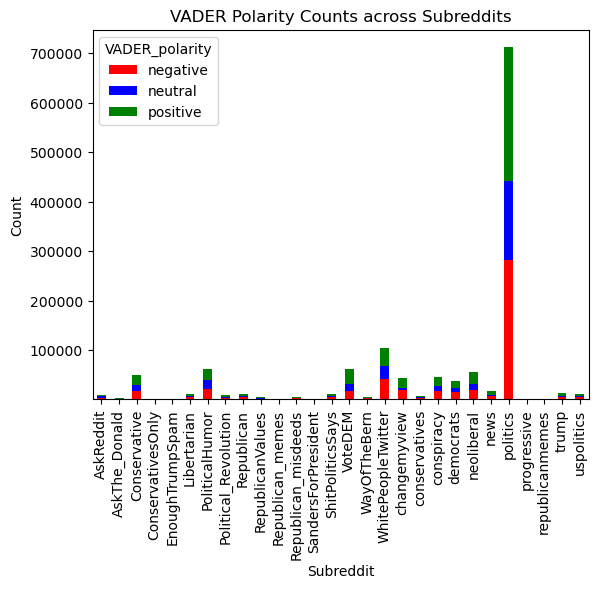

In [ ]:
# Count the occurrences of each VADER polarity for each subreddit
counts = df.groupby(['subreddit', 'VADER_polarity']).size().unstack(fill_value=0)

# Create bar plot
counts.plot(kind='bar', stacked=True, color=['red', 'blue', 'green'])

# Add labels and title
plt.xlabel('Subreddit')
plt.ylabel('Count')
plt.title('VADER Polarity Counts across Subreddits')

# Show plot
plt.show()

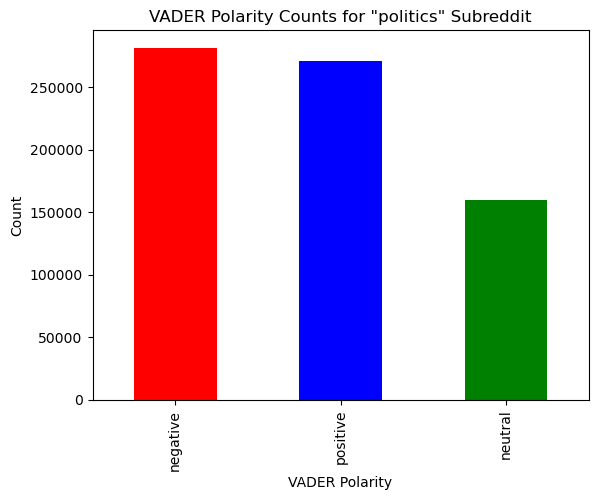

In [ ]:
# Filter the DataFrame for 'politics' subreddit
politics_df = df[df['subreddit'] == 'politics']

# Count the occurrences of each VADER polarity
counts = politics_df['VADER_polarity'].value_counts()

# Create bar plot
counts.plot(kind='bar', color=['red', 'blue', 'green'])

# Add labels and title
plt.xlabel('VADER Polarity')
plt.ylabel('Count')
plt.title('VADER Polarity Counts for "politics" Subreddit')

# Show plot
plt.show()

#### distilBERT counts

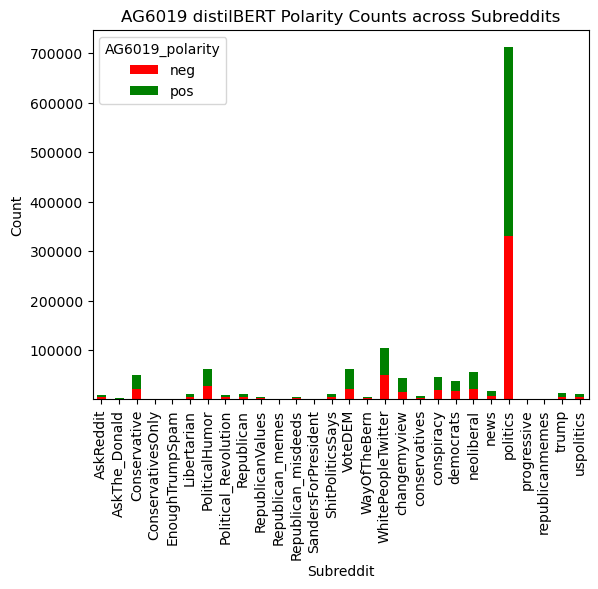

In [ ]:
# Count the occurrences of each VADER polarity for each subreddit
counts = df.groupby(['subreddit', 'AG6019_polarity']).size().unstack(fill_value=0)

# Create bar plot
counts.plot(kind='bar', stacked=True, color=['red', 'green'])

# Add labels and title
plt.xlabel('Subreddit')
plt.ylabel('Count')
plt.title('AG6019 distilBERT Polarity Counts across Subreddits')

# Show plot
plt.show()

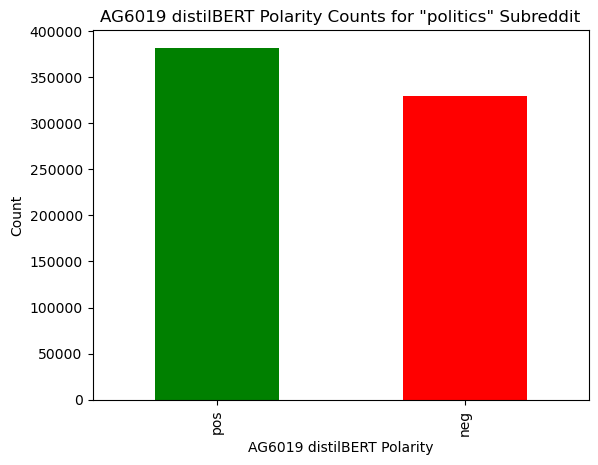

In [ ]:
# Filter the DataFrame for 'politics' subreddit
politics_df = df[df['subreddit'] == 'politics']

# Count the occurrences of each VADER polarity
counts = politics_df['AG6019_polarity'].value_counts()

# Create bar plot
counts.plot(kind='bar', color=['green', 'red', 'blue'])

# Add labels and title
plt.xlabel('AG6019 distilBERT Polarity')
plt.ylabel('Count')
plt.title('AG6019 distilBERT Polarity Counts for "politics" Subreddit')

# Show plot
plt.show()

#### Text Blob counts

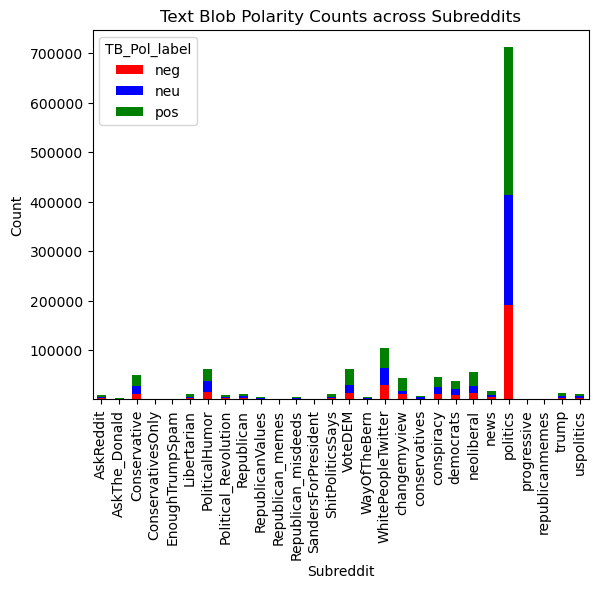

In [ ]:
# Count the occurrences of each VADER polarity for each subreddit
counts = df.groupby(['subreddit', 'TB_Pol_label']).size().unstack(fill_value=0)

# Create bar plot
counts.plot(kind='bar', stacked=True, color=['red', 'blue', 'green'])

# Add labels and title
plt.xlabel('Subreddit')
plt.ylabel('Count')
plt.title('Text Blob Polarity Counts across Subreddits')

# Show plot
plt.show()

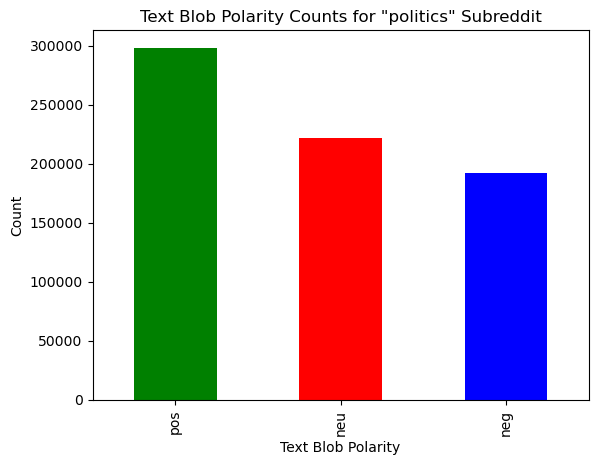

In [ ]:
# Filter the DataFrame for 'politics' subreddit
politics_df = df[df['subreddit'] == 'politics']

# Count the occurrences of each VADER polarity
counts = politics_df['TB_Pol_label'].value_counts()

# Create bar plot
counts.plot(kind='bar', color=['green', 'red', 'blue'])

# Add labels and title
plt.xlabel('Text Blob Polarity')
plt.ylabel('Count')
plt.title('Text Blob Polarity Counts for "politics" Subreddit')

# Show plot
plt.show()

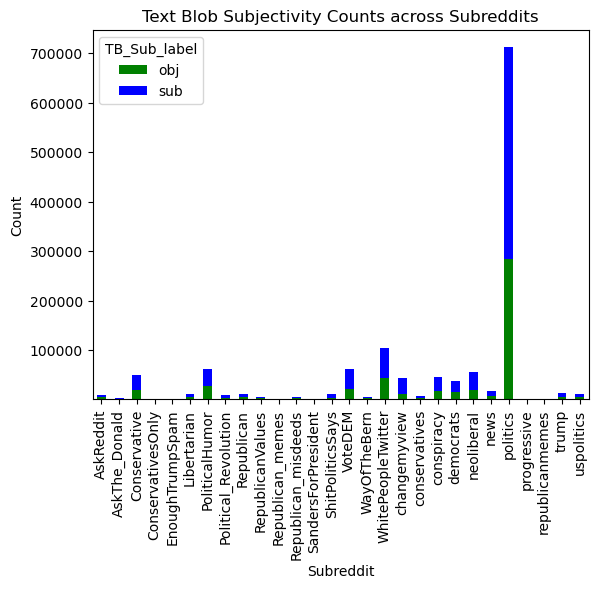

In [ ]:
# Count the occurrences of each VADER polarity for each subreddit
counts = df.groupby(['subreddit', 'TB_Sub_label']).size().unstack(fill_value=0)

# Create bar plot
counts.plot(kind='bar', stacked=True, color=['green', 'blue', 'red'])

# Add labels and title
plt.xlabel('Subreddit')
plt.ylabel('Count')
plt.title('Text Blob Subjectivity Counts across Subreddits')

# Show plot
plt.show()

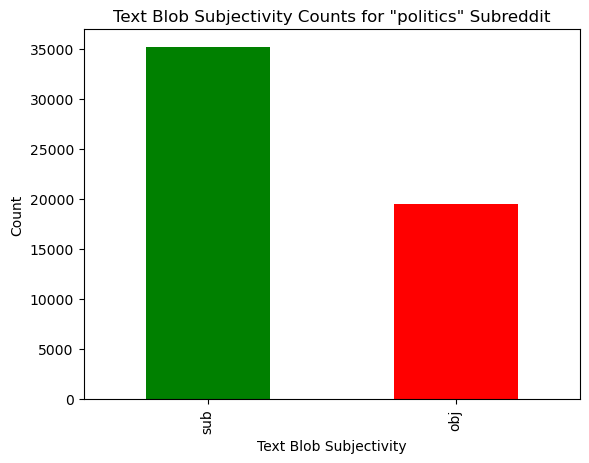

In [ ]:
# Filter the DataFrame for 'politics' subreddit
politics_df = df[df['subreddit'] == 'neoliberal']

# Count the occurrences of each VADER polarity
counts = politics_df['TB_Sub_label'].value_counts()

# Create bar plot
counts.plot(kind='bar', color=['green', 'red', 'blue'])

# Add labels and title
plt.xlabel('Text Blob Subjectivity')
plt.ylabel('Count')
plt.title('Text Blob Subjectivity Counts for "politics" Subreddit')

# Show plot
plt.show()

### Republican / GOP only analysis

In [ ]:
# Filter out rows that do not contain the specified words in 'self_text' column
keywords = ['Republican', 'republican', 'GOP', 'gop']
gop= df[df['self_text'].str.contains('|'.join(keywords))]

# Print the filtered DataFrame
gop.shape

(122082, 32)

#### GOP Subset creation

In [ ]:
gop_democrats = gop[(gop['subreddit'] == 'VoteDEM') | (gop['subreddit'] == 'democrats') | (gop['subreddit'] == 'RepublicanValues')]
gop_republican = gop[(gop['subreddit'] == 'Republican') | (gop['subreddit'] == 'Conservative')]
gop_politics = gop[(gop['subreddit'] == 'politics') | (gop['subreddit'] == 'uspolitics')]
gop_neutral =  gop[(gop['subreddit'] == 'WhitePeopleTwitter') | (gop['subreddit'] == 'news') | (gop['subreddit'] == 'AskReddit')]
gop_nutjobs = gop[(gop['subreddit'] == 'Libertarian') | (gop['subreddit'] == 'conspiracy') | (gop['subreddit'] == 'neoliberal')]

gopsubsets = [gop_democrats, gop_republican, gop_politics, gop_neutral, gop_nutjobs]

gopshapes = [gop_democrats.shape, gop_republican.shape, gop_politics.shape, gop_neutral.shape, gop_nutjobs.shape]
gopshapes

[(12748, 32), (5330, 32), (73133, 32), (10098, 32), (8719, 32)]

In [ ]:
for i in range(len(gopsubsets)):
    gopsubsets[i] = gopsubsets[i].reset_index(drop=True)


In [ ]:
gopsubsets[0].head()

,Anger,Disgust,Fear,Joy,Neutral,Sadness,Surprise,AG6019_neg,AG6019_pos,neg,neu,pos,compound,TB_Pol_label,TB_Sub_label,TB_Polarity,TB_Subjectivity,score,self_text,subreddit,ups,post_score,post_title,post_upvote_ratio,date,year,month,numerical_label,AG6019_polarity,emotion,emotion2,VADER_polarity
0,0.147503,0.028870,0.352546,0.008249,0.404183,0.049312,0.009338,0.242464,0.757536,0.000,1.000,0.000,0.0000,neu,obj,0.000000,0.000000,1,Don’t vote for him. Vote to re-elect Presiden...,democrats,1,37,Don’t Be Lulled Into Thinking Trump II Will Ju...,0.98,2024-03-13 19:35:03,2024,3,28,pos,Neutral,Fear,neutral
1,0.038638,0.464347,0.013966,0.018990,0.210285,0.239016,0.014759,0.656579,0.343421,0.000,1.000,0.000,0.0000,pos,sub,0.416667,0.583333,1,Hey it gets dumber...there are gay Republicans.,RepublicanValues,1,62,Any woman that supports republican is crazier ...,1.00,2024-03-13 19:05:13,2024,3,80,neg,Disgust,Disgust,neutral
2,0.013496,0.006412,0.007083,0.026676,0.928737,0.002886,0.014709,0.394483,0.605517,0.000,0.939,0.061,0.3400,pos,sub,0.137500,0.387500,1,If Trump saves Tik tok (convinces the senate r...,democrats,1,11,Why Trump is now against a TikTok ban,0.88,2024-03-13 18:59:50,2024,3,73,pos,Neutral,Joy,positive
3,0.035112,0.030444,0.016558,0.012570,0.786115,0.041559,0.077642,0.302597,0.697403,0.000,0.899,0.101,0.4019,neu,obj,0.000000,0.000000,8,some republicans that are planning on leaving ...,VoteDEM,8,260,Ken Buck Teases More Republican Resignations A...,1.00,2024-03-13 18:29:30,2024,3,91,pos,Neutral,Surprise,positive
4,0.036266,0.009458,0.052588,0.012021,0.879171,0.005804,0.004692,0.012204,0.987796,0.066,0.807,0.127,0.8972,pos,sub,0.066429,0.473466,9,"The danger was never them voting for Trump, th...",VoteDEM,9,88,We're launching Adopt-a-Candidate for 2024!,0.99,2024-03-13 18:24:12,2024,3,33,pos,Neutral,Fear,positive


#### GOP line graph

In [ ]:
filtered_gop = {}

for i in range(len(gopsubsets)):
    filtered_gop[i] = gopsubsets[i].drop_duplicates(subset=['post_title'])
    filtered_gop[i]['date'] = pd.to_datetime(filtered_gop[i]['date'])
    filtered_gop[i] = filtered_gop[i].reset_index(drop=True)

# Create an empty dictionary to store the results
posts_per_dayGOP = {
    0 : {},
    1 : {},
    2 : {},
    3 : {},
    4 : {}   
}

# Iterate through the DataFrame
for o in range(len(posts_per_dayGOP)):
    for i in range(len(filtered_gop)):
        for index, row in filtered_gop[i].iterrows():
            date = row['date'].date()  # Extracting the date part
            if date not in posts_per_dayGOP[o]:
                posts_per_dayGOP[o][date] = 1
            else:
                posts_per_dayGOP[o][date] += 1



C:\Users\javie\AppData\Local\Temp\ipykernel_13036\3836364072.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_gop[i]['date'] = pd.to_datetime(filtered_gop[i]['date'])
C:\Users\javie\AppData\Local\Temp\ipykernel_13036\3836364072.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_gop[i]['date'] = pd.to_datetime(filtered_gop[i]['date'])
C:\Users\javie\AppData\Local\Temp\ipykernel_13036\3836364072.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

In [ ]:
posts_per_dayGOP[1]

{datetime.date(2024, 3, 13): 145,
 datetime.date(2024, 3, 12): 132,
 datetime.date(2024, 3, 11): 107,
 datetime.date(2024, 3, 10): 101,
 datetime.date(2024, 3, 9): 96,
 datetime.date(2024, 3, 8): 132,
 datetime.date(2024, 3, 7): 143,
 datetime.date(2024, 3, 6): 157,
 datetime.date(2024, 3, 5): 105,
 datetime.date(2024, 3, 4): 110,
 datetime.date(2024, 3, 3): 100,
 datetime.date(2024, 3, 2): 68,
 datetime.date(2024, 3, 1): 104,
 datetime.date(2024, 2, 29): 127,
 datetime.date(2024, 2, 28): 114,
 datetime.date(2024, 2, 27): 99,
 datetime.date(2024, 2, 26): 109,
 datetime.date(2024, 2, 25): 96,
 datetime.date(2024, 2, 24): 96,
 datetime.date(2024, 2, 23): 131,
 datetime.date(2024, 2, 22): 117,
 datetime.date(2024, 2, 21): 125,
 datetime.date(2024, 2, 20): 90,
 datetime.date(2024, 2, 19): 86,
 datetime.date(2024, 2, 18): 67,
 datetime.date(2024, 2, 17): 87,
 datetime.date(2024, 2, 16): 95,
 datetime.date(2024, 2, 15): 137,
 datetime.date(2024, 2, 14): 120,
 datetime.date(2024, 2, 13): 117,

In [ ]:
filtered_gop = {}

for i in range(len(gopsubsets)):
    filtered_gop[i] = gopsubsets[i].drop_duplicates(subset=['post_title'])
    filtered_gop[i]['date'] = pd.to_datetime(filtered_gop[i]['date'])
    filtered_gop[i] = filtered_gop[i].reset_index(drop=True)

posts_per_weekGOP = {
    0 : {},
    1 : {},
    2 : {},
    3 : {},
    4 : {}   
}

# Iterate through the DataFrame
for o in range(len(posts_per_weekGOP)):
    for i in range(len(filtered_gop)):
        # Iterate through the DataFrame
        for index, row in filtered_gop[i].iterrows():
            week_start = row['date'].to_period('W').start_time.date()  # Get the start date of the week
            if week_start not in posts_per_weekGOP[o]:
                posts_per_weekGOP[o][week_start] = 1
            else:
                posts_per_weekGOP[o][week_start] += 1

# Printing the dictionary
posts_per_weekGOP

C:\Users\javie\AppData\Local\Temp\ipykernel_13036\766277688.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_gop[i]['date'] = pd.to_datetime(filtered_gop[i]['date'])
C:\Users\javie\AppData\Local\Temp\ipykernel_13036\766277688.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_gop[i]['date'] = pd.to_datetime(filtered_gop[i]['date'])
C:\Users\javie\AppData\Local\Temp\ipykernel_13036\766277688.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

{0: {datetime.date(2024, 3, 11): 384,
  datetime.date(2024, 3, 4): 844,
  datetime.date(2024, 2, 26): 721,
  datetime.date(2024, 2, 19): 741,
  datetime.date(2024, 2, 12): 705,
  datetime.date(2024, 2, 5): 800,
  datetime.date(2024, 1, 29): 664,
  datetime.date(2024, 1, 22): 848,
  datetime.date(2024, 1, 15): 770,
  datetime.date(2024, 1, 8): 659,
  datetime.date(2024, 1, 1): 615,
  datetime.date(2023, 12, 25): 494,
  datetime.date(2023, 12, 18): 576,
  datetime.date(2023, 12, 11): 562,
  datetime.date(2023, 12, 4): 642,
  datetime.date(2023, 11, 27): 614,
  datetime.date(2023, 11, 20): 361,
  datetime.date(2023, 11, 13): 544,
  datetime.date(2023, 11, 6): 186,
  datetime.date(2023, 10, 30): 92,
  datetime.date(2023, 10, 23): 94,
  datetime.date(2023, 10, 16): 101,
  datetime.date(2023, 10, 9): 85,
  datetime.date(2023, 10, 2): 58,
  datetime.date(2023, 9, 25): 33,
  datetime.date(2023, 9, 18): 21,
  datetime.date(2023, 9, 11): 13,
  datetime.date(2023, 9, 4): 15,
  datetime.date(2023,

In [ ]:
posts_per_weekGOP[3]

{datetime.date(2024, 3, 11): 384,
 datetime.date(2024, 3, 4): 844,
 datetime.date(2024, 2, 26): 721,
 datetime.date(2024, 2, 19): 741,
 datetime.date(2024, 2, 12): 705,
 datetime.date(2024, 2, 5): 800,
 datetime.date(2024, 1, 29): 664,
 datetime.date(2024, 1, 22): 848,
 datetime.date(2024, 1, 15): 770,
 datetime.date(2024, 1, 8): 659,
 datetime.date(2024, 1, 1): 615,
 datetime.date(2023, 12, 25): 494,
 datetime.date(2023, 12, 18): 576,
 datetime.date(2023, 12, 11): 562,
 datetime.date(2023, 12, 4): 642,
 datetime.date(2023, 11, 27): 614,
 datetime.date(2023, 11, 20): 361,
 datetime.date(2023, 11, 13): 544,
 datetime.date(2023, 11, 6): 186,
 datetime.date(2023, 10, 30): 92,
 datetime.date(2023, 10, 23): 94,
 datetime.date(2023, 10, 16): 101,
 datetime.date(2023, 10, 9): 85,
 datetime.date(2023, 10, 2): 58,
 datetime.date(2023, 9, 25): 33,
 datetime.date(2023, 9, 18): 21,
 datetime.date(2023, 9, 11): 13,
 datetime.date(2023, 9, 4): 15,
 datetime.date(2023, 8, 28): 17,
 datetime.date(2023

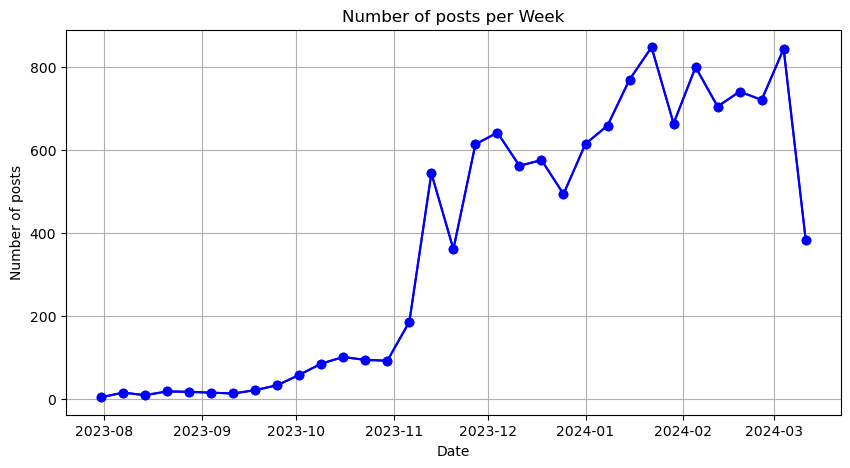

In [ ]:
postsWeekSeries = {}

for i in range(len(posts_per_weekGOP)):
    postsWeekSeries[i] = pd.Series(posts_per_weekGOP[i])

# Plotting
plt.figure(figsize=(10, 5))
postsWeekSeries[0].plot(marker='o', color='blue', linestyle='-')
postsWeekSeries[1].plot(marker='o', color='blue', linestyle='-')
plt.title('Number of posts per Week')
plt.xlabel('Date')
plt.ylabel('Number of posts')
plt.grid(True)
plt.show()


#### Compound scores


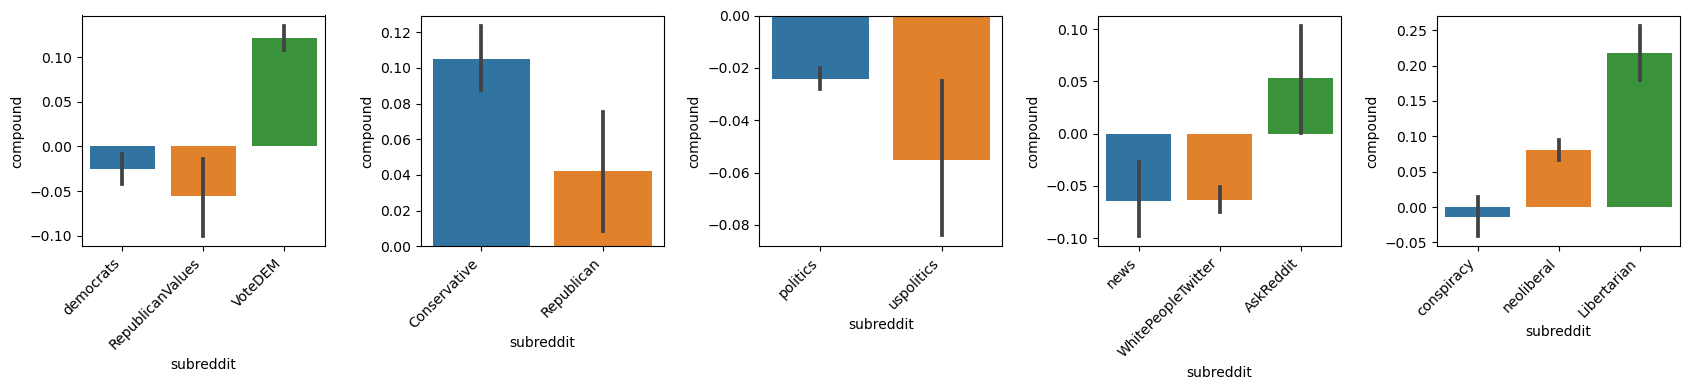

In [ ]:
subset_names = ['GOP (democrats)', 'GOP (republican)', 'GOP (politics()', 'GOP (neutral)', 'GOP (nutjobs)']
num_plots = len(subset_names)

fig, axs = plt.subplots(1, num_plots, figsize=(17, 4))  # Adjust figsize as needed

for i in range(num_plots):
    ax = sns.barplot(data=gopsubsets[i], x='subreddit', y='compound', ax=axs[i])
    #ax.set_title(f'Compound scores for {subset_names[i]}')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')  # Rotate x-labels for better visibility

plt.tight_layout()
plt.show()

#### VADER_polarity counts GOP

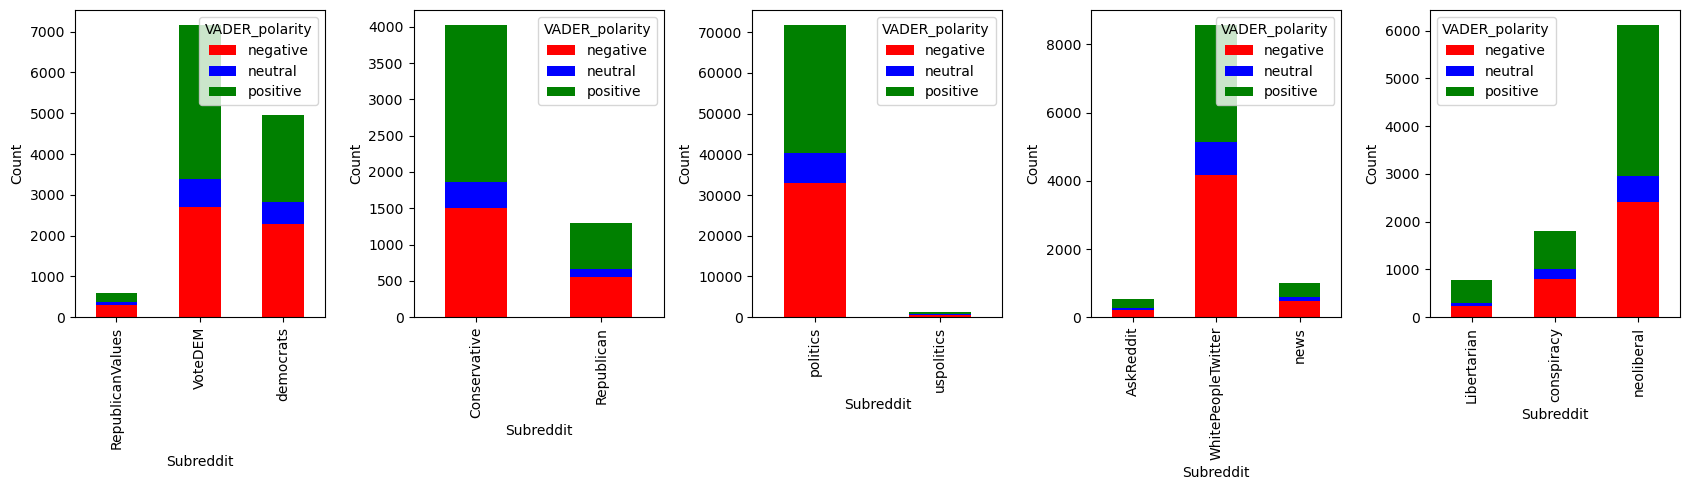

In [ ]:
num_plots = len(gopsubsets)

# Calculate the number of rows needed for the grid layout
num_rows = 1
num_cols = num_plots

# Create subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(17, 5))  # Adjust figsize as needed

# Iterate over each subset and plot it in the corresponding subplot
for i in range(num_plots):
    # Count the occurrences of each VADER polarity for each subreddit
    counts = gopsubsets[i].groupby(['subreddit', 'VADER_polarity']).size().unstack(fill_value=0)

    # Plot in the corresponding subplot
    ax = axs[i]
    counts.plot(kind='bar', stacked=True, color=['red', 'blue', 'green'], ax=ax)

    # Add labels and title
    ax.set_xlabel('Subreddit')
    ax.set_ylabel('Count')
    #|ax.set_title('VADER Polarity (GOP)')

# Adjust layout
plt.tight_layout()
plt.show()

#### distilBERT counts GOP

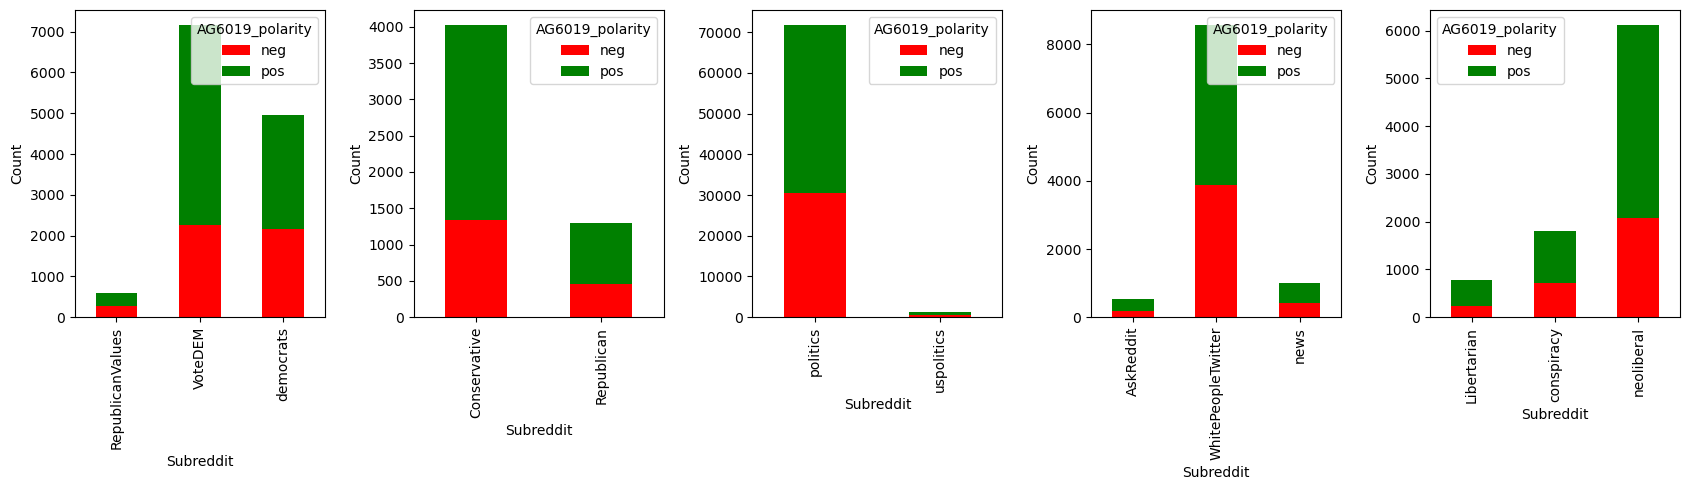

In [ ]:
num_plots = len(gopsubsets)

# Calculate the number of rows needed for the grid layout
num_rows = 1
num_cols = num_plots

# Create subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(17, 5))  # Adjust figsize as needed

# Iterate over each subset and plot it in the corresponding subplot
for i in range(num_plots):
    # Count the occurrences of each VADER polarity for each subreddit
    counts = gopsubsets[i].groupby(['subreddit', 'AG6019_polarity']).size().unstack(fill_value=0)

    # Plot in the corresponding subplot
    ax = axs[i]
    counts.plot(kind='bar', stacked=True, color=['red', 'green'], ax=ax)

    # Add labels and title
    ax.set_xlabel('Subreddit')
    ax.set_ylabel('Count')
    #ax.set_title('AG6019 distilBERT polarity (GOP)')

# Adjust layout
plt.tight_layout()
plt.show()

#### Text Blob counts GOP

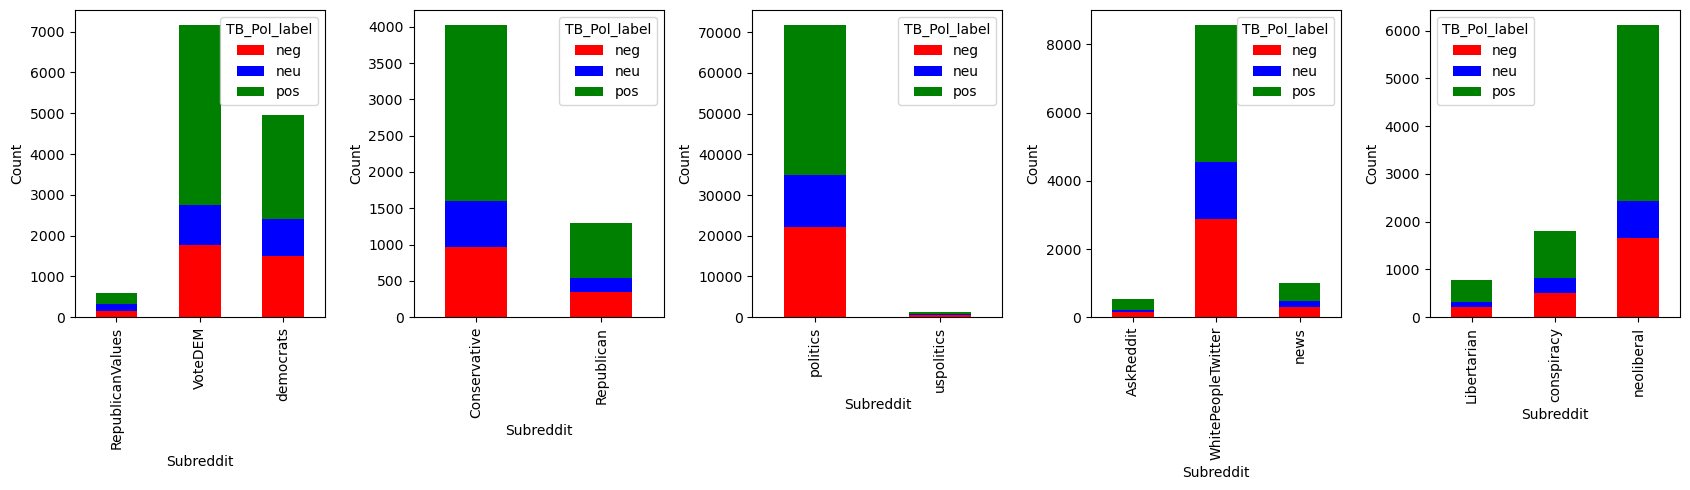

In [ ]:
num_plots = len(gopsubsets)

# Calculate the number of rows needed for the grid layout
num_rows = 1
num_cols = num_plots

# Create subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(17, 5))  # Adjust figsize as needed

# Iterate over each subset and plot it in the corresponding subplot
for i in range(num_plots):
    # Count the occurrences of each Text Blob polarity for each subreddit
    counts = gopsubsets[i].groupby(['subreddit', 'TB_Pol_label']).size().unstack(fill_value=0)

    # Plot in the corresponding subplot
    ax = axs[i]
    counts.plot(kind='bar', stacked=True, color=['red', 'blue', 'green'], ax=ax)

    # Add labels and title
    ax.set_xlabel('Subreddit')
    ax.set_ylabel('Count')
    #ax.set_title('Text Blob Polarity (GOP)')

# Adjust layout
plt.tight_layout()
plt.show()

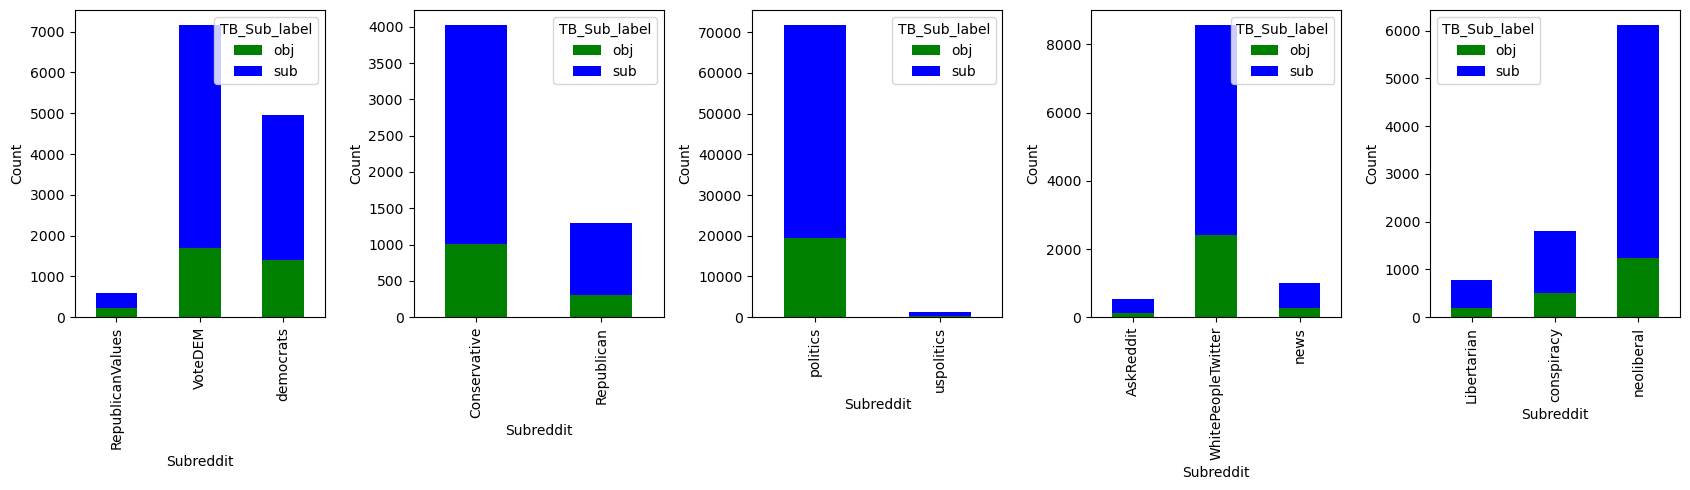

In [ ]:
num_plots = len(gopsubsets)

# Calculate the number of rows needed for the grid layout
num_rows = 1
num_cols = num_plots

# Create subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(17, 5))  # Adjust figsize as needed

# Iterate over each subset and plot it in the corresponding subplot
for i in range(num_plots):
    # Count the occurrences of each Text Blob subjectivity for each subreddit
    counts = gopsubsets[i].groupby(['subreddit', 'TB_Sub_label']).size().unstack(fill_value=0)

    # Plot in the corresponding subplot
    ax = axs[i]
    counts.plot(kind='bar', stacked=True, color=['green', 'blue', 'red'], ax=ax)

    # Add labels and title
    ax.set_xlabel('Subreddit')
    ax.set_ylabel('Count')
    #ax.set_title('Text Blob Subjectivity (GOP)')

# Adjust layout
plt.tight_layout()
plt.show()

#### Emotions GOP

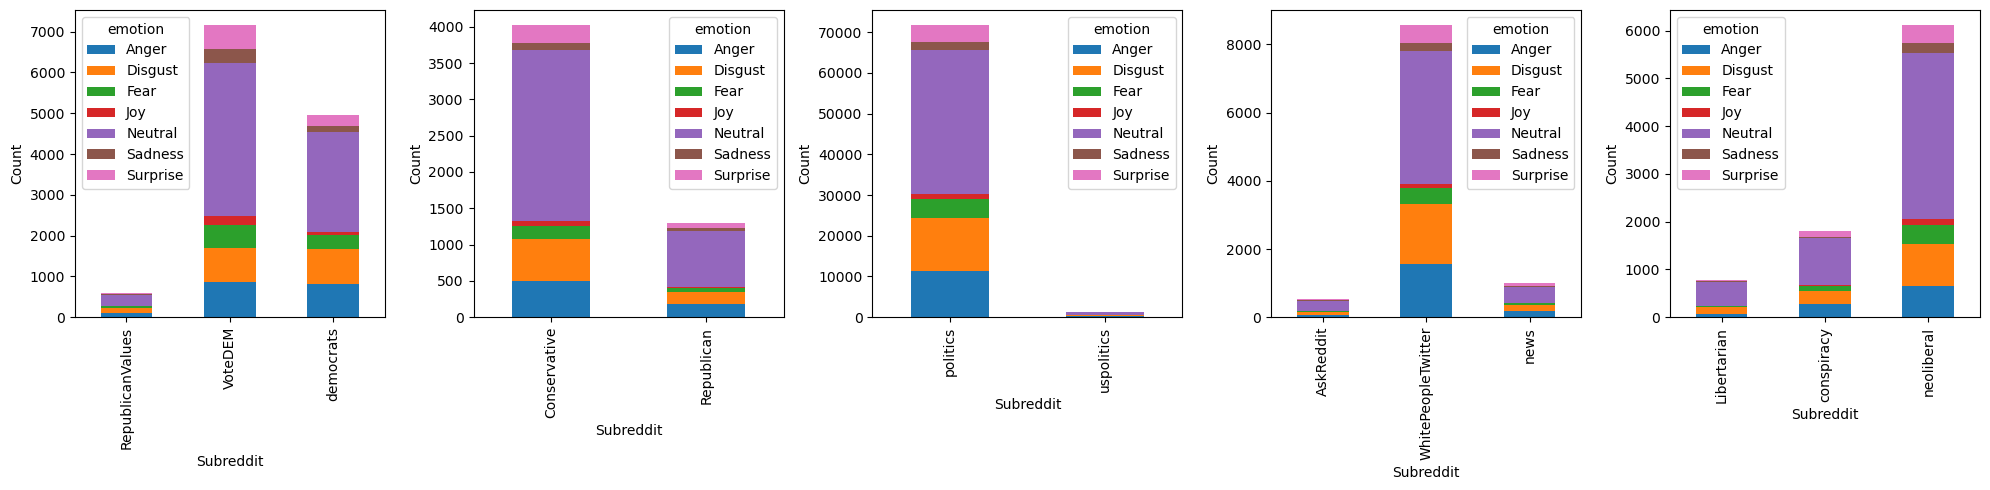

In [ ]:
num_plots = len(gopsubsets)

# Calculate the number of rows needed for the grid layout
num_rows = 1
num_cols = num_plots

# Create subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(20, 5))  # Adjust figsize as needed

# Iterate over each subset and plot it in the corresponding subplot
for i in range(num_plots):
    # Count the occurrences of each emotion for each subreddit
    counts = gopsubsets[i].groupby(['subreddit', 'emotion']).size().unstack(fill_value=0)

    # Plot in the corresponding subplot
    ax = axs[i]
    counts.plot(kind='bar', stacked=True, ax=ax)

    # Add labels and title
    ax.set_xlabel('Subreddit')
    ax.set_ylabel('Count')
    #ax.set_title('Emotions Across Subreddits (GOP)')

# Adjust layout
plt.tight_layout()
plt.show()

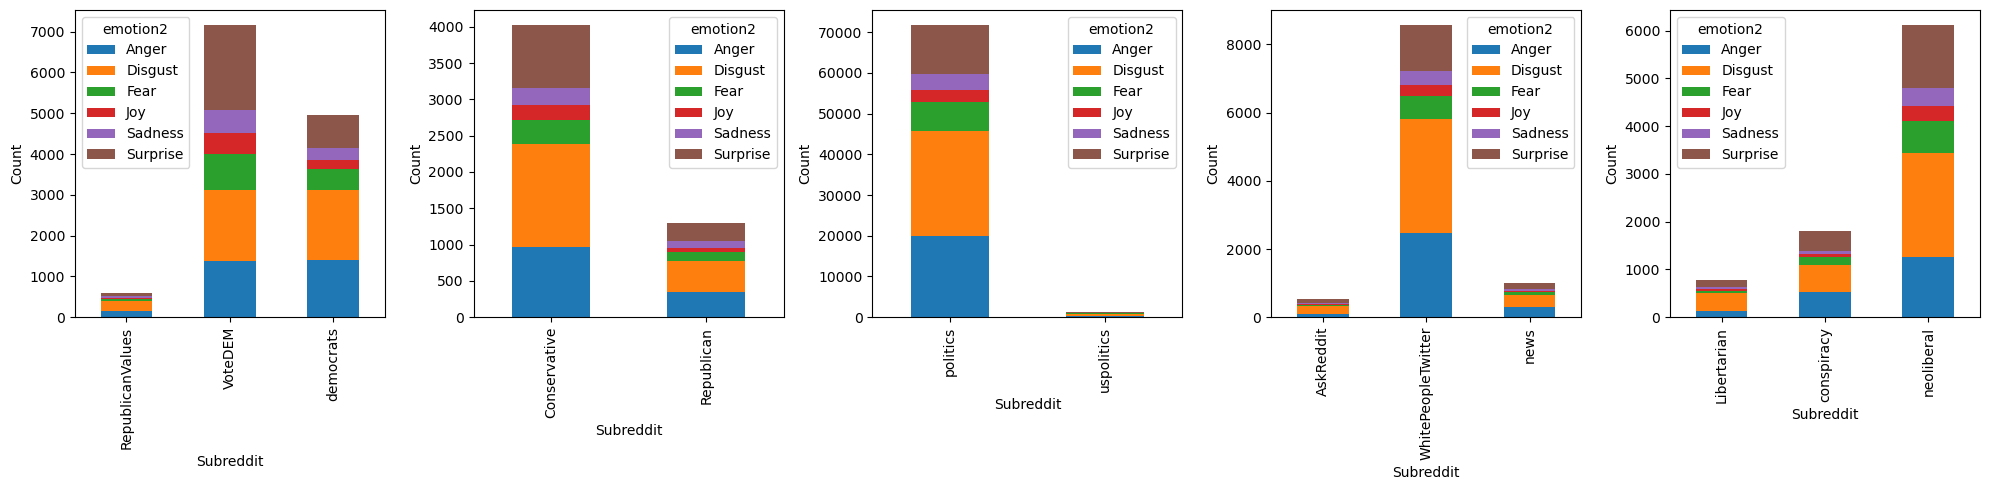

In [ ]:
num_plots = len(gopsubsets)

# Calculate the number of rows needed for the grid layout
num_rows = 1
num_cols = num_plots

# Create subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(20, 5))  # Adjust figsize as needed

# Iterate over each subset and plot it in the corresponding subplot
for i in range(num_plots):
    # Count the occurrences of each emotion for each subreddit
    counts = gopsubsets[i].groupby(['subreddit', 'emotion2']).size().unstack(fill_value=0)

    # Plot in the corresponding subplot
    ax = axs[i]
    counts.plot(kind='bar', stacked=True, ax=ax)

    # Add labels and title
    ax.set_xlabel('Subreddit')
    ax.set_ylabel('Count')
    #ax.set_title('Emotions Across Subreddits (GOP)')

# Adjust layout
plt.tight_layout()
plt.show()

### Trump only analysis

In [ ]:
# Filter out rows that do not contain the specified words in 'self_text' column
keywords = ['Trump', 'trump']
trump = df[df['self_text'].str.contains('|'.join(keywords))]

# Print the filtered DataFrame
trump.shape

(210175, 32)

#### Trump Subset creation

In [ ]:
trump_democrats = trump[(trump['subreddit'] == 'VoteDEM') | (trump['subreddit'] == 'democrats') | (trump['subreddit'] == 'RepublicanValues')]
trump_republican = trump[(trump['subreddit'] == 'Republican') | (trump['subreddit'] == 'Conservative')]
trump_politics = trump[(trump['subreddit'] == 'politics') | (trump['subreddit'] == 'uspolitics')]
trump_neutral =  trump[(trump['subreddit'] == 'WhitePeopleTwitter') | (trump['subreddit'] == 'news') | (trump['subreddit'] == 'AskReddit')]
trump_nutjobs = trump[(trump['subreddit'] == 'Libertarian') | (trump['subreddit'] == 'conspiracy') | (trump['subreddit'] == 'neoliberal')]

Tsubsets = [trump_democrats, trump_republican, trump_politics, trump_neutral, trump_nutjobs]

Tshapes = [trump_democrats.shape, trump_republican.shape, trump_politics.shape, trump_neutral.shape, trump_nutjobs.shape]
Tshapes

[(11665, 32), (11358, 32), (130661, 32), (17160, 32), (17066, 32)]

In [ ]:
for i in range(len(Tsubsets)):
    Tsubsets[i] = Tsubsets[i].reset_index(drop=True)


In [ ]:
Tsubsets[0].head()

,Anger,Disgust,Fear,Joy,Neutral,Sadness,Surprise,AG6019_neg,AG6019_pos,neg,neu,pos,compound,TB_Pol_label,TB_Sub_label,TB_Polarity,TB_Subjectivity,score,self_text,subreddit,ups,post_score,post_title,post_upvote_ratio,date,year,month,numerical_label,AG6019_polarity,emotion,emotion2,VADER_polarity
0,0.951155,0.012670,0.014247,0.000680,0.014757,0.003152,0.003339,0.840249,0.159751,0.087,0.847,0.066,-0.2023,pos,obj,0.100000,0.300000,1,Biden going to be opening the “Not Trump” tent...,VoteDEM,1,88,We're launching Adopt-a-Candidate for 2024!,0.99,2024-03-13 19:14:58,2024,3,33,neg,Anger,Anger,negative
1,0.021711,0.011197,0.115212,0.004164,0.822176,0.009788,0.015751,0.111940,0.888060,0.055,0.884,0.061,0.1911,pos,sub,0.134091,0.532576,6,There likely won't be a few month break if thi...,VoteDEM,6,88,We're launching Adopt-a-Candidate for 2024!,0.99,2024-03-13 19:08:57,2024,3,33,pos,Neutral,Fear,positive
2,0.133344,0.007655,0.010782,0.084485,0.533617,0.149445,0.080671,0.925151,0.074849,0.254,0.746,0.000,-0.5267,neu,obj,0.000000,0.000000,14,"[Trump Posts Article Calling Nikki Haley a ""Lo...",VoteDEM,14,88,We're launching Adopt-a-Candidate for 2024!,0.99,2024-03-13 19:03:26,2024,3,33,neg,Neutral,Sadness,negative
3,0.013496,0.006412,0.007083,0.026676,0.928737,0.002886,0.014709,0.394483,0.605517,0.000,0.939,0.061,0.3400,pos,sub,0.137500,0.387500,1,If Trump saves Tik tok (convinces the senate r...,democrats,1,11,Why Trump is now against a TikTok ban,0.88,2024-03-13 18:59:50,2024,3,73,pos,Neutral,Joy,positive
4,0.425418,0.466604,0.006113,0.002467,0.028119,0.018697,0.052583,0.943920,0.056080,0.278,0.722,0.000,-0.7430,neu,obj,0.000000,0.000000,11,Damn it. It’s a video:\n\nQuestion: Do you tak...,VoteDEM,11,88,We're launching Adopt-a-Candidate for 2024!,0.99,2024-03-13 18:52:00,2024,3,33,neg,Disgust,Disgust,negative


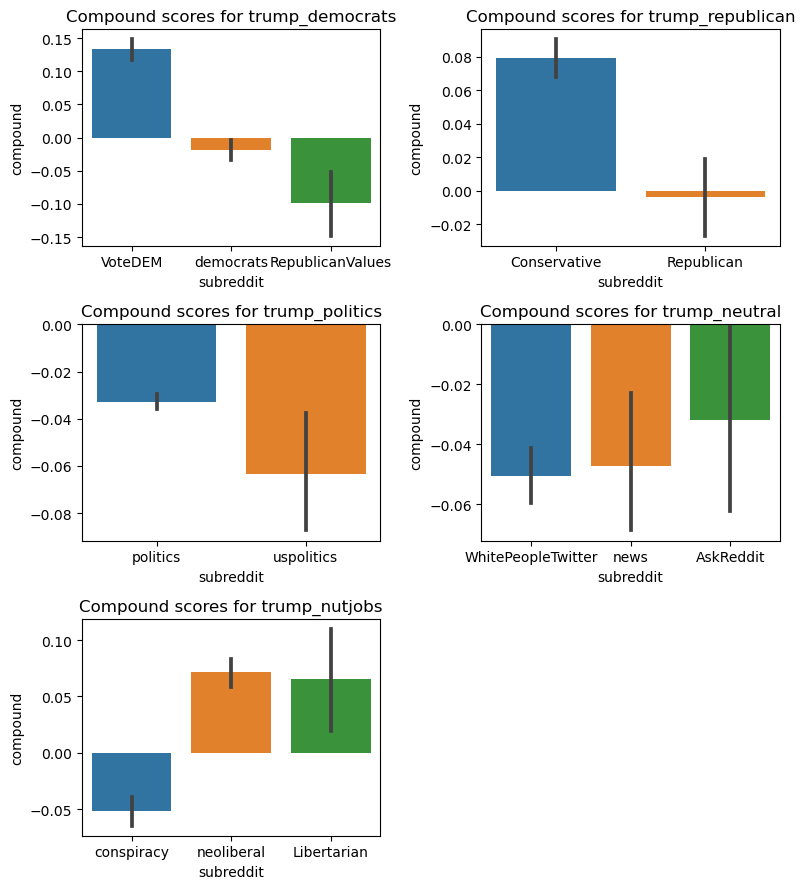

In [ ]:
subset_names = ['trump_democrats', 'trump_republican', 'trump_politics', 'trump_neutral', 'trump_nutjobs']
num_plots = len(Tsubsets)
num_rows = (num_plots + 1) // 2  # Calculate the number of rows needed for the grid layout

fig, axs = plt.subplots(num_rows, 2, figsize=(8, 3*num_rows))

for i in range(num_plots):
    row = i // 2
    col = i % 2
    ax = sns.barplot(data=Tsubsets[i], x='subreddit', y='compound', ax=axs[row, col])
    ax.set_title(f'Compound scores for {subset_names[i]}')

# Hide any unused subplots
for i in range(num_plots, num_rows*2):
    row = i // 2
    col = i % 2
    fig.delaxes(axs[row, col])

plt.tight_layout()
plt.show()

#### VADER_polarity counts Trump

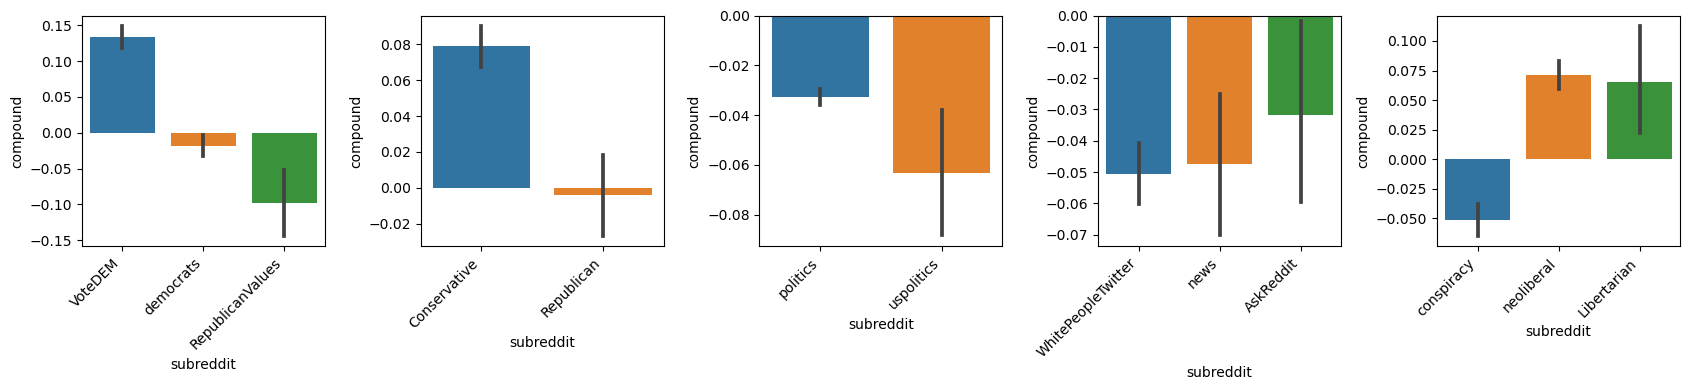

In [ ]:
subset_names = ['Trump (democrats)', 'Trump (republican)', 'Trump (politics()', 'Trump (neutral)', 'Trump (nutjobs)']
num_plots = len(subset_names)

fig, axs = plt.subplots(1, num_plots, figsize=(17, 4))  # Adjust figsize as needed

for i in range(num_plots):
    ax = sns.barplot(data=Tsubsets[i], x='subreddit', y='compound', ax=axs[i])
    #ax.set_title(f'Compound scores for {subset_names[i]}')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')  # Rotate x-labels for better visibility

plt.tight_layout()
plt.show()

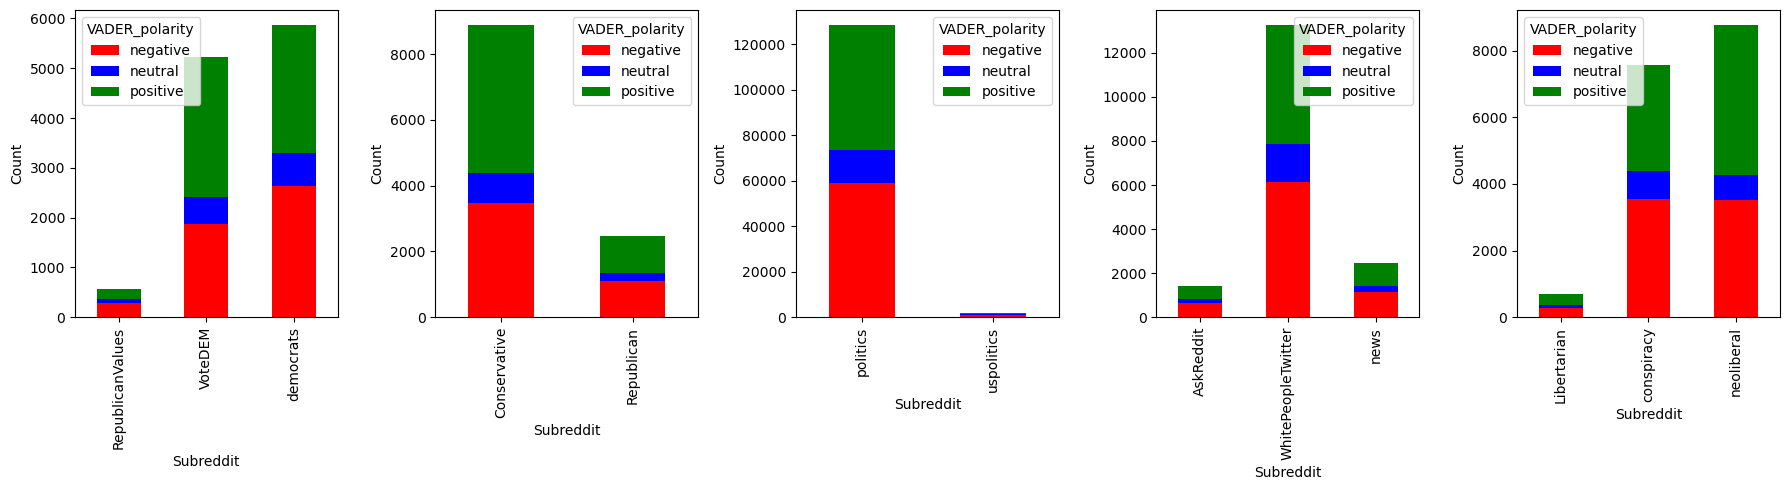

In [ ]:
num_plots = len(Tsubsets)

# Calculate the number of rows needed for the grid layout
num_rows = 1
num_cols = num_plots

# Create subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(18, 5))  # Adjust figsize as needed

# Iterate over each subset and plot it in the corresponding subplot
for i in range(num_plots):
    # Count the occurrences of each VADER polarity for each subreddit
    counts = Tsubsets[i].groupby(['subreddit', 'VADER_polarity']).size().unstack(fill_value=0)

    # Plot in the corresponding subplot
    ax = axs[i]
    counts.plot(kind='bar', stacked=True, color=['red', 'blue', 'green'], ax=ax)

    # Add labels and title
    ax.set_xlabel('Subreddit')
    ax.set_ylabel('Count')
    #ax.set_title('VADER Polarity (Trump)')

# Adjust layout
plt.tight_layout()
plt.show()

#### distilBERT counts Trump

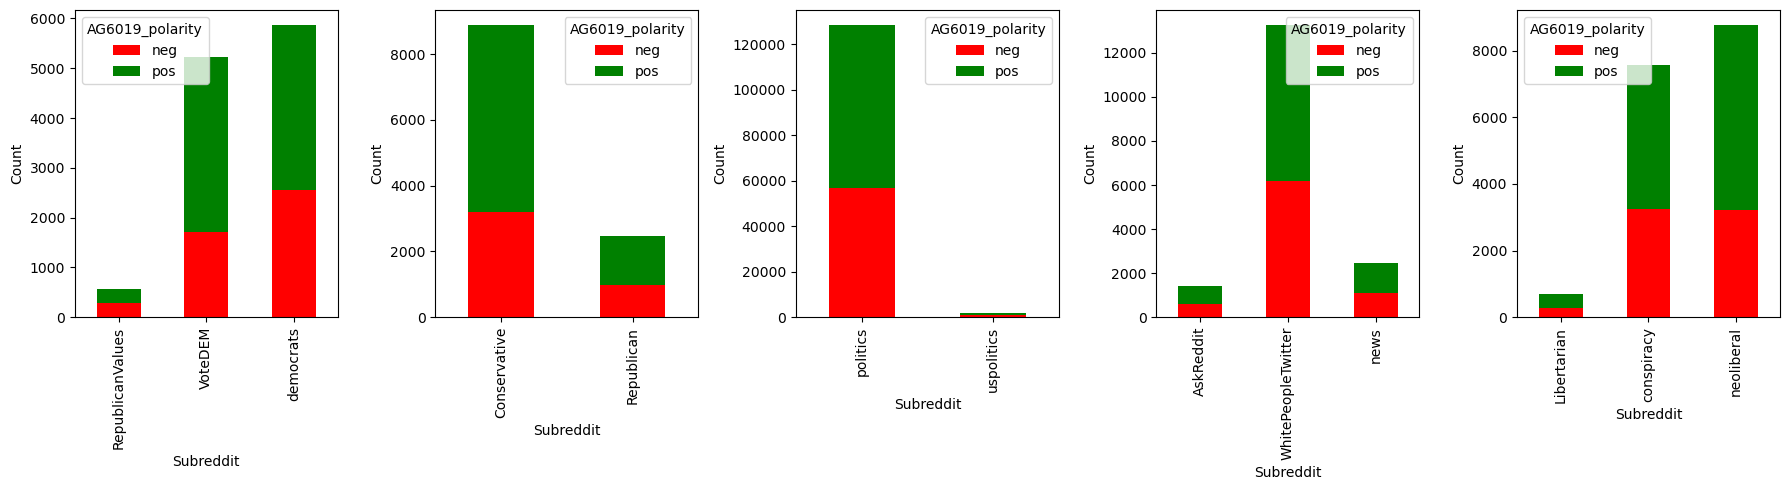

In [ ]:
num_plots = len(Tsubsets)

# Calculate the number of rows needed for the grid layout
num_rows = 1
num_cols = num_plots

# Create subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(18, 5))  # Adjust figsize as needed

# Iterate over each subset and plot it in the corresponding subplot
for i in range(num_plots):
    # Count the occurrences of each VADER polarity for each subreddit
    counts = Tsubsets[i].groupby(['subreddit', 'AG6019_polarity']).size().unstack(fill_value=0)

    # Plot in the corresponding subplot
    ax = axs[i]
    counts.plot(kind='bar', stacked=True, color=['red', 'green'], ax=ax)

    # Add labels and title
    ax.set_xlabel('Subreddit')
    ax.set_ylabel('Count')
    #ax.set_title('AG6019 distilBERT polarity (Trump)')

# Adjust layout
plt.tight_layout()
plt.show()

#### Text Blob counts Trump

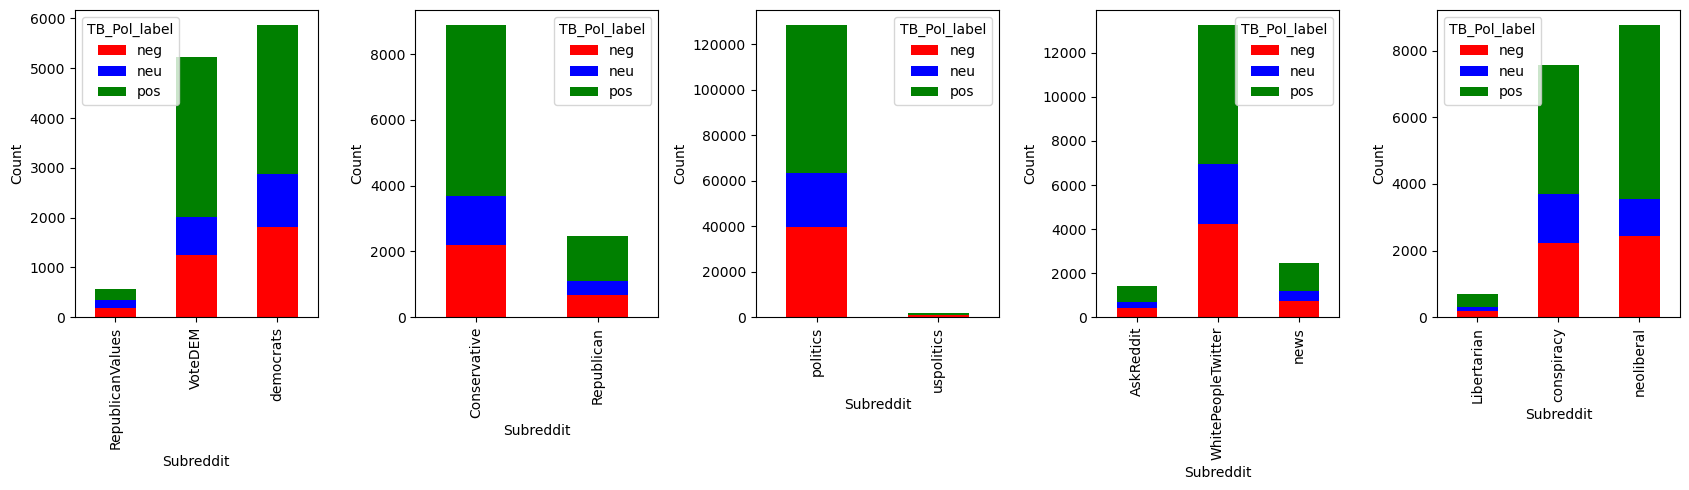

In [ ]:
num_plots = len(Tsubsets)

# Calculate the number of rows needed for the grid layout
num_rows = 1
num_cols = num_plots

# Create subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(17, 5))  # Adjust figsize as needed

# Iterate over each subset and plot it in the corresponding subplot
for i in range(num_plots):
    # Count the occurrences of each Text Blob polarity for each subreddit
    counts = Tsubsets[i].groupby(['subreddit', 'TB_Pol_label']).size().unstack(fill_value=0)

    # Plot in the corresponding subplot
    ax = axs[i]
    counts.plot(kind='bar', stacked=True, color=['red', 'blue', 'green'], ax=ax)

    # Add labels and title
    ax.set_xlabel('Subreddit')
    ax.set_ylabel('Count')
    #ax.set_title('Text Blob Polarity (Trump)')

# Adjust layout
plt.tight_layout()
plt.show()

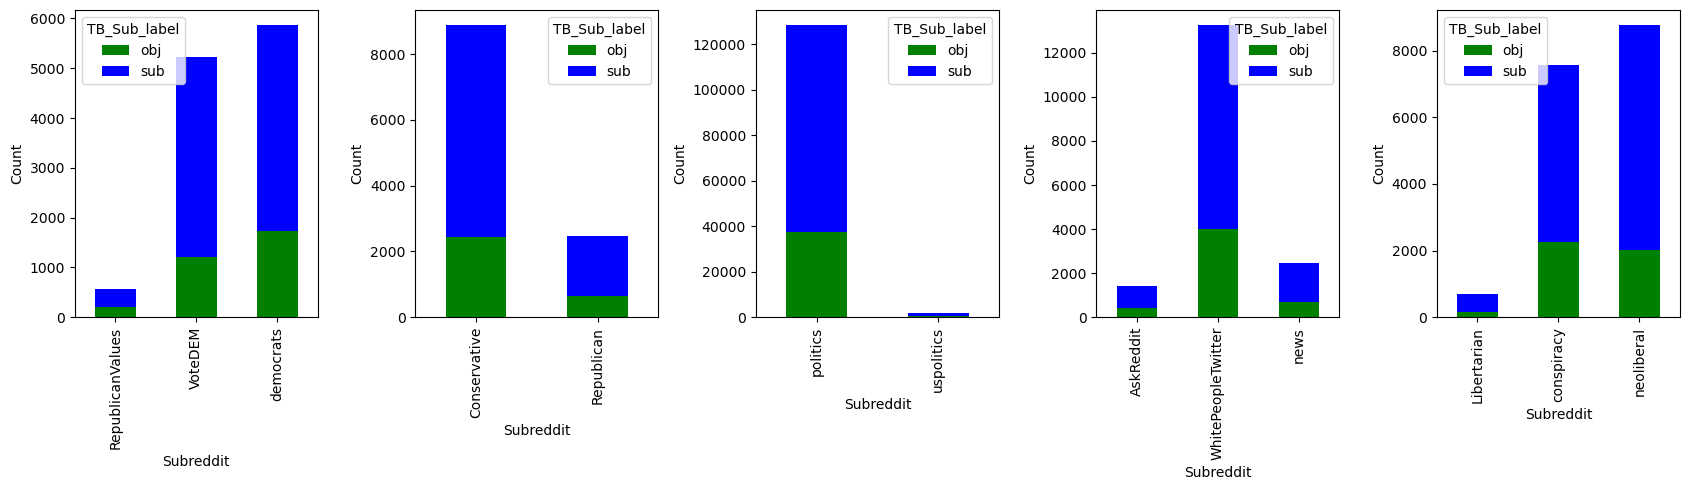

In [ ]:
num_plots = len(Tsubsets)

# Calculate the number of rows needed for the grid layout
num_rows = 1
num_cols = num_plots

# Create subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(17, 5))  # Adjust figsize as needed

# Iterate over each subset and plot it in the corresponding subplot
for i in range(num_plots):
    # Count the occurrences of each Text Blob subjectivity for each subreddit
    counts = Tsubsets[i].groupby(['subreddit', 'TB_Sub_label']).size().unstack(fill_value=0)

    # Plot in the corresponding subplot
    ax = axs[i]
    counts.plot(kind='bar', stacked=True, color=['green', 'blue', 'red'], ax=ax)

    # Add labels and title
    ax.set_xlabel('Subreddit')
    ax.set_ylabel('Count')
    #ax.set_title('Text Blob Subjectivity (Trump)')

# Adjust layout
plt.tight_layout()
plt.show()

#### Emotion distributions

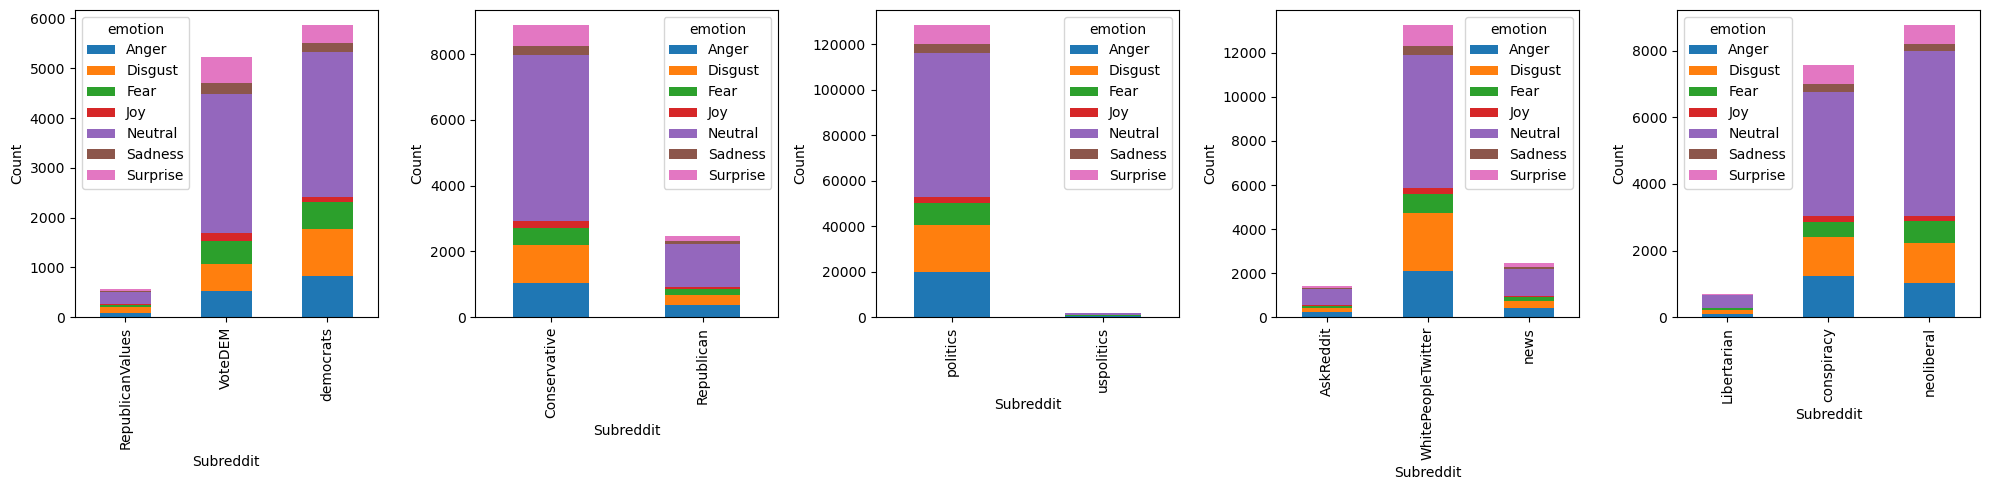

In [ ]:
num_plots = len(Tsubsets)

# Calculate the number of rows needed for the grid layout
num_rows = 1
num_cols = num_plots

# Create subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(20, 5))  # Adjust figsize as needed

# Iterate over each subset and plot it in the corresponding subplot
for i in range(num_plots):
    # Count the occurrences of each emotion for each subreddit
    counts = Tsubsets[i].groupby(['subreddit', 'emotion']).size().unstack(fill_value=0)

    # Plot in the corresponding subplot
    ax = axs[i]
    counts.plot(kind='bar', stacked=True, ax=ax)

    # Add labels and title
    ax.set_xlabel('Subreddit')
    ax.set_ylabel('Count')
    #ax.set_title('Emotions Across Subreddits (Trump)')

# Adjust layout
plt.tight_layout()
plt.show()

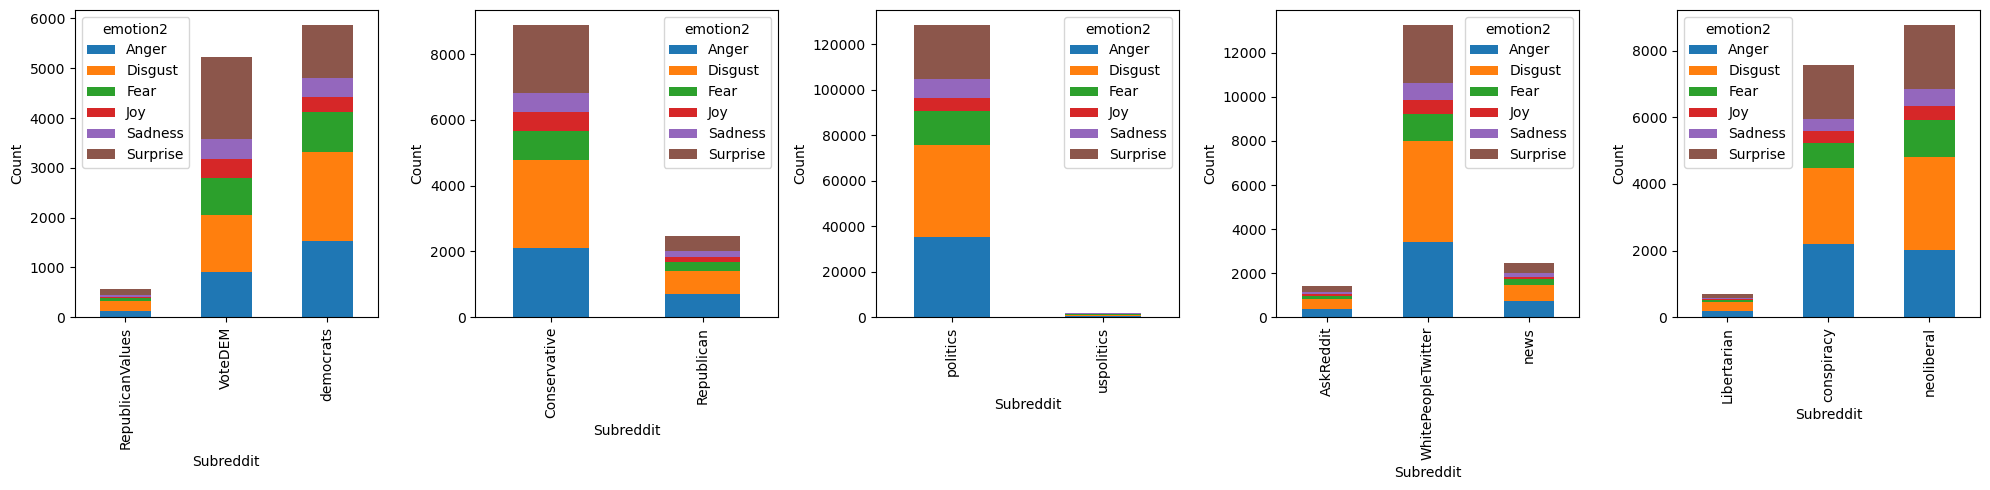

In [ ]:
num_plots = len(Tsubsets)

# Calculate the number of rows needed for the grid layout
num_rows = 1
num_cols = num_plots

# Create subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(20, 5))  # Adjust figsize as needed

# Iterate over each subset and plot it in the corresponding subplot
for i in range(num_plots):
    # Count the occurrences of each emotion for each subreddit
    counts = Tsubsets[i].groupby(['subreddit', 'emotion2']).size().unstack(fill_value=0)

    # Plot in the corresponding subplot
    ax = axs[i]
    counts.plot(kind='bar', stacked=True, ax=ax)

    # Add labels and title
    ax.set_xlabel('Subreddit')
    ax.set_ylabel('Count')
    #ax.set_title('Emotions Across Subreddits (Trump)')

# Adjust layout
plt.tight_layout()
plt.show()

### Samples

In [ ]:
max_compound_row = gopsubsets[1].iloc[gopsubsets[1]['Surprise'].idxmax()]

# Convert the selected row into a DataFrame
max_compound_row_df = pd.DataFrame([max_compound_row], columns=max_compound_row.index)

max_compound_row_df = max_compound_row_df.reset_index(drop=True)
max_compound_row_df
#max_compound_row_df['self_text'][0]





,Anger,Disgust,Fear,Joy,Neutral,Sadness,Surprise,AG6019_neg,AG6019_pos,neg,neu,pos,compound,TB_Pol_label,TB_Sub_label,TB_Polarity,TB_Subjectivity,score,self_text,subreddit,ups,post_score,post_title,post_upvote_ratio,date,year,month,numerical_label,AG6019_polarity,emotion,emotion2,VADER_polarity
0,0.00358,0.001265,0.001108,0.001695,0.006098,0.001549,0.984704,0.012529,0.987471,0.178,0.754,0.068,-0.4696,pos,sub,0.278571,0.494643,-3,I'm surprised that DeSantis hasn't realized th...,Conservative,-3,2,Ron DeSantis Says Unborn Children Have a God-G...,0.51,2024-01-11 21:05:43,2024,1,12059,pos,Surprise,Surprise,negative


### Word Cloud

In [ ]:
!pip install wordcloud
from wordcloud import WordCloud

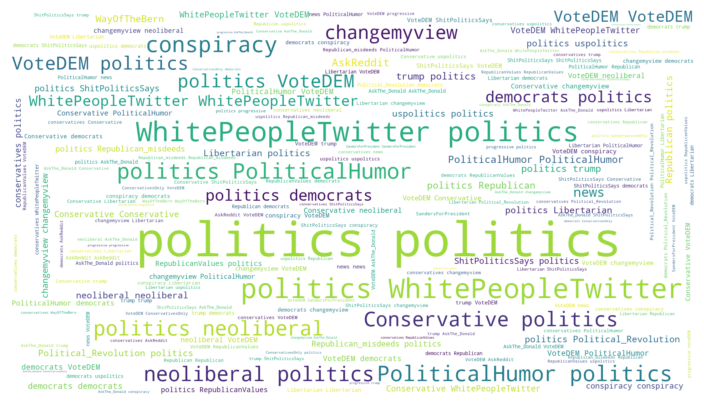

In [ ]:
subreddit_text = ' '.join(df['subreddit'])

# Create a WordCloud object
wordcloud = WordCloud(width=1920, height=1080, background_color='white').generate(subreddit_text)

# Display the generated word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off') 
plt.show()